In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# Read the application dataset to a dataframe
application_df = pd.read_csv("application_data.csv")

# Read the previous application dataset to a dataframe
prev_df = pd.read_csv("previous_application.csv")

In [2]:
application_df.shape

(307511, 122)

In [3]:
prev_df.shape

(1670214, 37)

In [4]:
# Find the percentage of missing values per each column in application df
print((application_df.isnull().sum() / len(application_df)*100).sort_values(ascending=False))

COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
                              ...    
NAME_HOUSING_TYPE            0.000000
NAME_FAMILY_STATUS           0.000000
NAME_EDUCATION_TYPE          0.000000
NAME_INCOME_TYPE             0.000000
SK_ID_CURR                   0.000000
Length: 122, dtype: float64


In [5]:
# Eliminating features with 50% missing values 
application_df = application_df.loc[: , (application_df.isnull().sum() / len(application_df) * 100) < 50]

In [6]:
application_df.shape # total 41 features were eliminated due to missing values.

(307511, 81)

In [7]:
# Determine percentage of missing values per each feature in previous application df
print((prev_df.isnull().sum() / len(prev_df)*100).sort_values(ascending=False))

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

In [8]:
# Eliminate features with more than 40% missing values
prev_df = prev_df.loc[: , (prev_df.isnull().sum() / len(prev_df) * 100) < 40]

In [9]:
prev_df.shape # total 11 features were eliminated because of missing values.

(1670214, 26)

In [10]:
# Filtering features with missing values % between 0 and 49
columns = application_df.columns[((application_df.isnull().sum() / len(application_df) * 100) <= 49) & ((application_df.isnull().sum() / len(application_df) * 100) > 0)]
print(columns)
print(len(columns))

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'TOTALAREA_MODE', 'EMERGENCYSTATE_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')
23


In [11]:
# Now we will check these features for outliers and subsitute with appropriate value for missing value
print(application_df['AMT_ANNUITY'].isnull().sum())
# This colum has 12 rows who have missing value

12


count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
10%       11074.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
99%       70006.500000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64



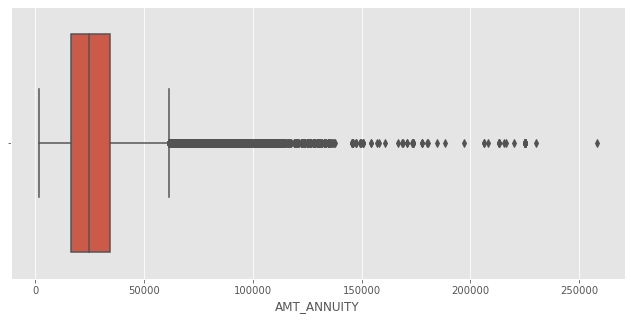

In [12]:
# Check for outliers 
print(application_df['AMT_ANNUITY'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]))
print()
plt.style.use('ggplot')
plt.figure(figsize=(11,5))
sns.boxplot(application_df['AMT_ANNUITY'])
plt.show()

In [13]:
application_df['AMT_ANNUITY'].skew() # here we can see our data is highly skewed

1.5797773638612507

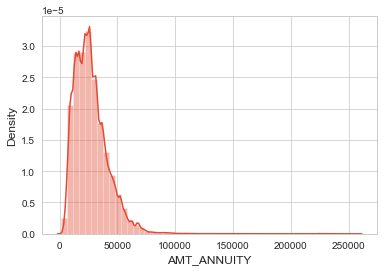

In [14]:
sns.set_style('whitegrid') 
sns.distplot(application_df['AMT_ANNUITY']) 
plt.show()

In [15]:
mean = application_df.loc[application_df['AMT_ANNUITY']<70006.500000, 'AMT_ANNUITY'].mean()
application_df.loc[application_df.AMT_ANNUITY > 70006.500000, 'AMT_ANNUITY'] = np.nan
application_df.fillna(mean,inplace=True)

In [16]:
application_df['AMT_ANNUITY'].skew() # now data is moderately skewed.

0.7370872671319317

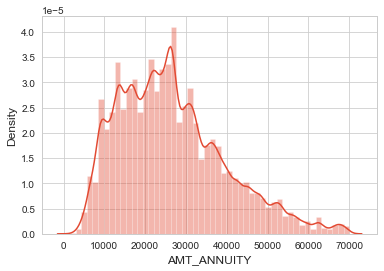

In [17]:
sns.set_style('whitegrid') 
sns.distplot(application_df['AMT_ANNUITY']) 
plt.show()

count    307511.000000
mean      26500.175468
std       12969.291534
min        1615.500000
10%       11074.500000
25%       16524.000000
50%       24903.000000
75%       33984.000000
99%       62964.000000
max       70006.500000
Name: AMT_ANNUITY, dtype: float64



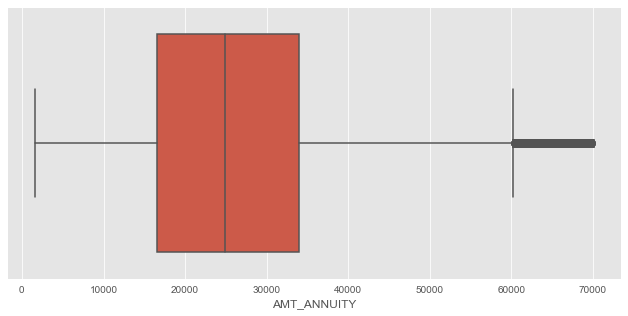

In [18]:
# Check for outliers using statistical summary for the column
print(application_df['AMT_ANNUITY'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]))
print()
plt.style.use('ggplot')
plt.figure(figsize=(11,5))
sns.boxplot(application_df['AMT_ANNUITY'])
plt.show()

In [19]:
# Checking null values for next feature
print(application_df['AMT_GOODS_PRICE'].isnull().sum())

0


count    3.075110e+05
mean     5.379334e+05
std      3.695997e+05
min      2.649862e+04
10%      1.800000e+05
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
99%      1.800000e+06
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64


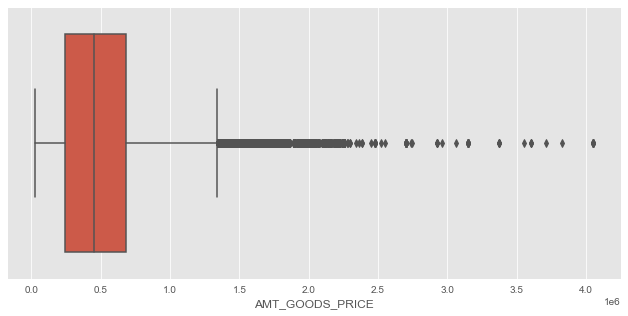

In [20]:
# Check for outliers 
print(application_df['AMT_GOODS_PRICE'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]))
plt.style.use('ggplot')
plt.figure(figsize=(11,5))
sns.boxplot(application_df['AMT_GOODS_PRICE'])
plt.show()

In [21]:
application_df['AMT_GOODS_PRICE'].fillna(value= application_df['AMT_GOODS_PRICE'].mean(), inplace=True)

In [22]:
print(application_df['AMT_GOODS_PRICE'].isnull().sum())

0


In [23]:
application_df['AMT_GOODS_PRICE'].skew() # here we can see our data is highly skewed

1.3474590228011676

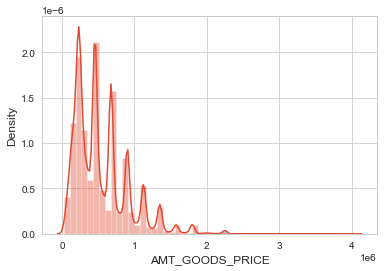

In [24]:
sns.set_style('whitegrid') 
sns.distplot(application_df['AMT_GOODS_PRICE']) 
plt.show()

In [25]:
mean = application_df.loc[application_df['AMT_GOODS_PRICE']<1.800000e+06, 'AMT_GOODS_PRICE'].mean()
application_df.loc[application_df.AMT_GOODS_PRICE > 1.800000e+06, 'AMT_GOODS_PRICE'] = np.nan
application_df.fillna(mean,inplace=True)

In [26]:
application_df['AMT_GOODS_PRICE'].skew() # here we can see our data is highly skewed

1.111775280728988

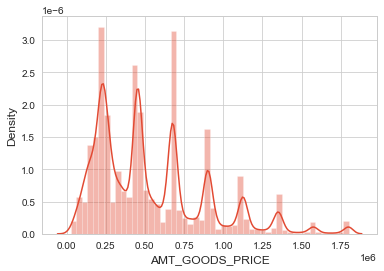

In [27]:
sns.set_style('whitegrid') 
sns.distplot(application_df['AMT_GOODS_PRICE']) 
plt.show()

count    3.075110e+05
mean     5.302031e+05
std      3.516217e+05
min      2.649862e+04
10%      1.800000e+05
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
99%      1.588500e+06
max      1.800000e+06
Name: AMT_GOODS_PRICE, dtype: float64


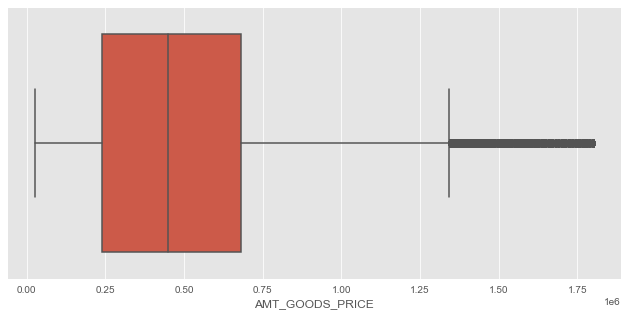

In [28]:
# Check for outliers 
print(application_df['AMT_GOODS_PRICE'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]))
plt.style.use('ggplot')
plt.figure(figsize=(11,5))
sns.boxplot(application_df['AMT_GOODS_PRICE'])
plt.show()

In [29]:
# For the next feature, but there are no missing values for this one, categorical value so no way to calculate outlier
print(application_df['NAME_TYPE_SUITE'].isnull().sum())

0


In [30]:
# For the next column, but there are no missing values for this one, categorical value, no way to calculate outlier
print(application_df['NAME_TYPE_SUITE'].isnull().sum())

0


In [31]:
# For the next column, but there are no missing values for this one
print(application_df['CNT_FAM_MEMBERS'].isnull().sum())

0


count    307511.000000
mean          2.324994
std          67.578938
min           1.000000
1%            1.000000
10%           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
99%           5.000000
max       26498.619144
Name: CNT_FAM_MEMBERS, dtype: float64



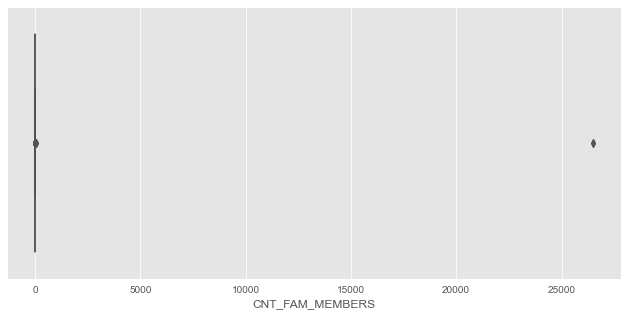

In [32]:
# Check for outliers
print(application_df['CNT_FAM_MEMBERS'].describe(percentiles=[0.01,0.1,0.25,0.5,0.75,0.99]))
print()
plt.style.use('ggplot')
plt.figure(figsize=(11,5))
sns.boxplot(application_df['CNT_FAM_MEMBERS'])
plt.show()

In [33]:
application_df['CNT_FAM_MEMBERS'].skew() # here we can see our data is highly skewed

392.0079749536612

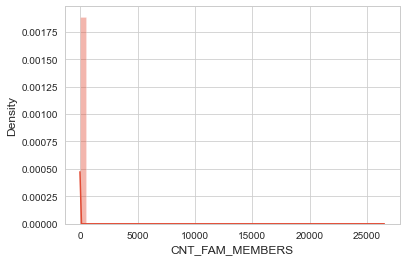

In [34]:
sns.set_style('whitegrid') 
sns.distplot(application_df['CNT_FAM_MEMBERS']) 
plt.show()

In [35]:
median = application_df.loc[application_df['CNT_FAM_MEMBERS']<5.000000, 'CNT_FAM_MEMBERS'].median()
application_df.loc[application_df.CNT_FAM_MEMBERS >5.000000, 'CNT_FAM_MEMBERS'] = np.nan
application_df.fillna(median,inplace=True)

In [36]:
application_df['CNT_FAM_MEMBERS'].skew() # here we can see our data is moderately skewed

0.777863671863985

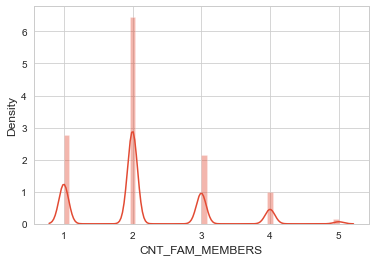

In [37]:
sns.set_style('whitegrid') 
sns.distplot(application_df['CNT_FAM_MEMBERS']) 
plt.show()

count    307511.000000
mean          2.144977
std           0.890906
min           1.000000
1%            1.000000
10%           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
99%           5.000000
max           5.000000
Name: CNT_FAM_MEMBERS, dtype: float64



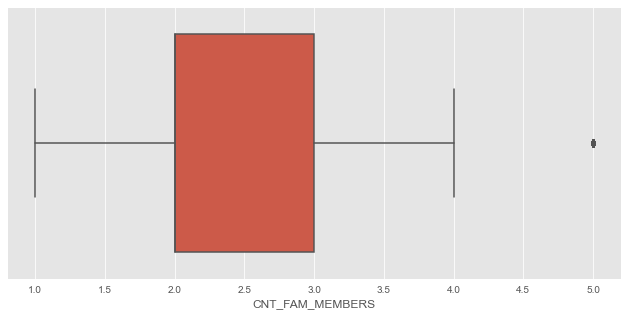

In [38]:
# Check for outliers 
print(application_df['CNT_FAM_MEMBERS'].describe(percentiles=[0.01,0.1,0.25,0.5,0.75,0.99]))
print()
plt.style.use('ggplot')
plt.figure(figsize=(11,5))
sns.boxplot(application_df['CNT_FAM_MEMBERS'])
plt.show()

In [39]:
# This feature has no null values.
print(application_df['EXT_SOURCE_2'].isnull().sum())

0


count    3.075110e+05
mean     5.738634e+01
std      1.226283e+03
min      8.173617e-08
1%       2.954992e-02
10%      2.162038e-01
25%      3.929737e-01
50%      5.664502e-01
75%      6.642124e-01
99%      7.859616e-01
max      2.649862e+04
Name: EXT_SOURCE_2, dtype: float64



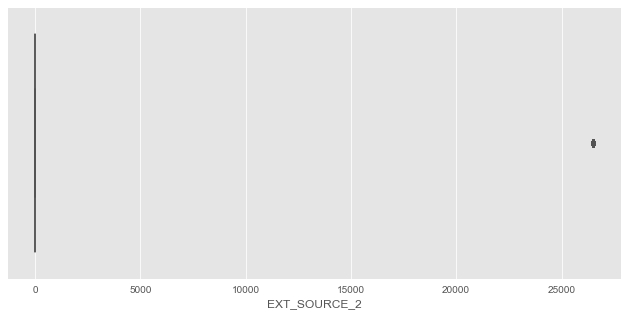

In [40]:
# Check for outliers 
print(application_df['EXT_SOURCE_2'].describe(percentiles=[0.01,0.1,0.25,0.5,0.75,0.99]))
print()
plt.style.use('ggplot')
plt.figure(figsize=(11,5))
sns.boxplot(application_df['EXT_SOURCE_2'])
plt.show()

In [41]:
# This feature has no null values.
print(application_df['EXT_SOURCE_3'].isnull().sum())

0


count    307511.000000
mean       5253.842187
std       10564.384291
min           0.000527
1%            0.073473
10%           0.256706
25%           0.417100
50%           0.604113
75%           0.773896
99%       26498.619144
max       26498.619144
Name: EXT_SOURCE_3, dtype: float64



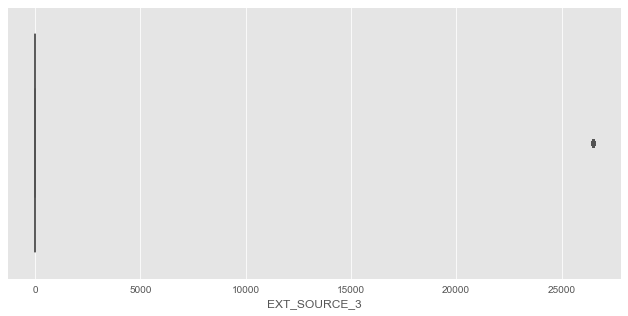

In [42]:
# Check for outliers 
print(application_df['EXT_SOURCE_3'].describe(percentiles=[0.01,0.1,0.25,0.5,0.75,0.99]))
print()
plt.style.use('ggplot')
plt.figure(figsize=(11,5))
sns.boxplot(application_df['EXT_SOURCE_3'])
plt.show()

In [43]:
# This feature has no null values.
print(application_df['YEARS_BEGINEXPLUATATION_AVG'].isnull().sum())

0


count    307511.000000
mean      12926.797282
std       13244.904333
min           0.000000
1%            0.957300
10%           0.975200
25%           0.981600
50%           0.998000
75%       26498.619144
99%       26498.619144
max       26498.619144
Name: YEARS_BEGINEXPLUATATION_AVG, dtype: float64



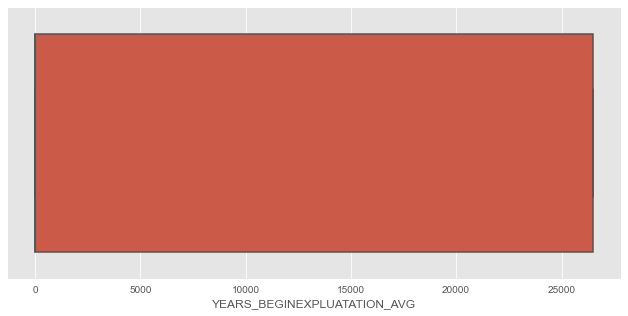

In [44]:
# Check for outliers 
print(application_df['YEARS_BEGINEXPLUATATION_AVG'].describe(percentiles=[0.01,0.1,0.25,0.5,0.75,0.99]))
print()
plt.style.use('ggplot')
plt.figure(figsize=(11,5))
sns.boxplot(application_df['YEARS_BEGINEXPLUATATION_AVG'])
plt.show()

In [45]:
# This feature has no null values.
print(application_df['YEARS_BEGINEXPLUATATION_MODE'].isnull().sum())

0


count    307511.000000
mean      12926.796939
std       13244.904668
min           0.000000
1%            0.956800
10%           0.975200
25%           0.981100
50%           0.998000
75%       26498.619144
99%       26498.619144
max       26498.619144
Name: YEARS_BEGINEXPLUATATION_MODE, dtype: float64



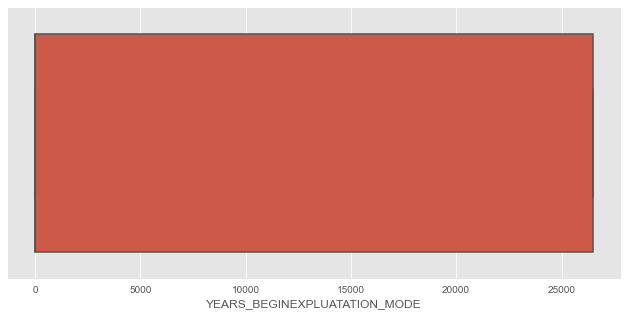

In [46]:
# Check for outliers 
print(application_df['YEARS_BEGINEXPLUATATION_MODE'].describe(percentiles=[0.01,0.1,0.25,0.5,0.75,0.99]))
print()
plt.style.use('ggplot')
plt.figure(figsize=(11,5))
sns.boxplot(application_df['YEARS_BEGINEXPLUATATION_MODE'])
plt.show()

In [47]:
# This feature has no null values.
print(application_df['YEARS_BEGINEXPLUATATION_MEDI'].isnull().sum())

0


count    307511.000000
mean      12926.797291
std       13244.904324
min           0.000000
1%            0.957300
10%           0.975200
25%           0.981600
50%           0.998000
75%       26498.619144
99%       26498.619144
max       26498.619144
Name: YEARS_BEGINEXPLUATATION_MEDI, dtype: float64



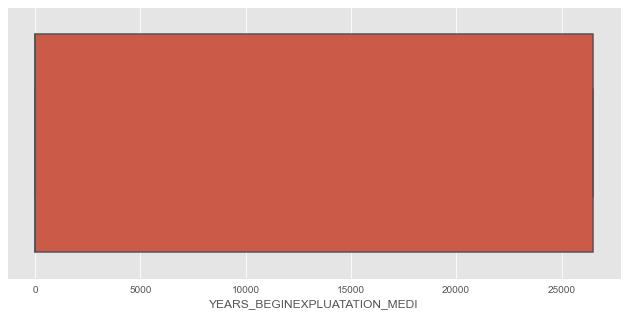

In [48]:
# Check for outliers 
print(application_df['YEARS_BEGINEXPLUATATION_MEDI'].describe(percentiles=[0.01,0.1,0.25,0.5,0.75,0.99]))
print()
plt.style.use('ggplot')
plt.figure(figsize=(11,5))
sns.boxplot(application_df['YEARS_BEGINEXPLUATATION_MEDI'])
plt.show()

In [49]:
print(application_df['OBS_30_CNT_SOCIAL_CIRCLE'].isnull().sum())

0


In [50]:
application_df['OBS_30_CNT_SOCIAL_CIRCLE'].skew() # here we can see our data is moderately skewed

17.268181926272607

count    307511.000000
mean         89.398409
std        1524.268751
min           0.000000
1%            0.000000
10%           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
99%          11.000000
max       26498.619144
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64



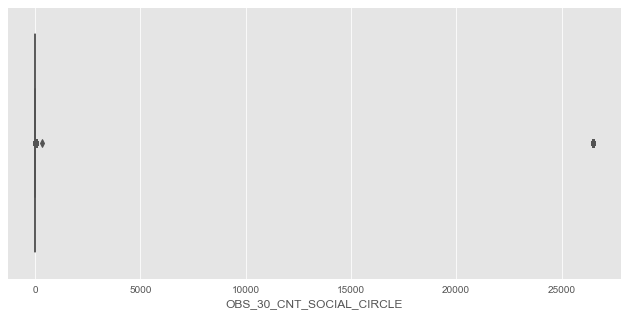

In [51]:
# Check for outliers 
print(application_df['OBS_30_CNT_SOCIAL_CIRCLE'].describe(percentiles=[0.01,0.1,0.25,0.5,0.75,0.99]))
print()
plt.style.use('ggplot')
plt.figure(figsize=(11,5))
sns.boxplot(application_df['OBS_30_CNT_SOCIAL_CIRCLE'],)
plt.show()

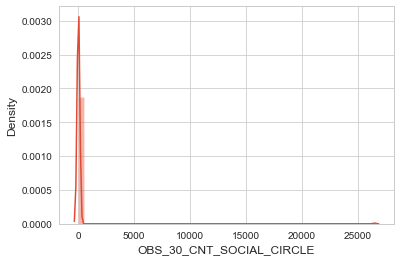

In [52]:
sns.set_style('whitegrid') 
sns.distplot(application_df['OBS_30_CNT_SOCIAL_CIRCLE']) 
plt.show()

In [53]:
median = application_df.loc[application_df['OBS_30_CNT_SOCIAL_CIRCLE']<25.000000, 'OBS_30_CNT_SOCIAL_CIRCLE'].median()
application_df.loc[application_df.OBS_30_CNT_SOCIAL_CIRCLE >25.000000, 'OBS_30_CNT_SOCIAL_CIRCLE'] = np.nan
application_df.fillna(median,inplace=True)

count    307511.000000
mean          1.415166
std           2.308330
min           0.000000
1%            0.000000
10%           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
99%          10.000000
max          25.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64


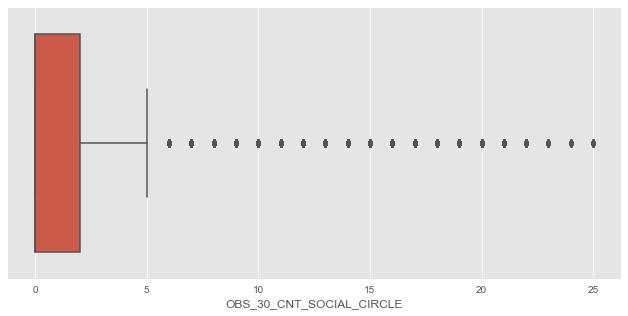

In [54]:
# Check for outliers 
print(application_df['OBS_30_CNT_SOCIAL_CIRCLE'].describe(percentiles=[0.01,0.1,0.25,0.5,0.75,0.99]))
plt.style.use('ggplot')
plt.figure(figsize=(11,5))
sns.boxplot(application_df['OBS_30_CNT_SOCIAL_CIRCLE'])
plt.show()

In [55]:
#next feature
print(application_df['DEF_30_CNT_SOCIAL_CIRCLE'].isnull().sum())

0


count    307511.000000
mean         88.123830
std        1524.340496
min           0.000000
1%            0.000000
10%           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
99%           2.000000
max       26498.619144
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64



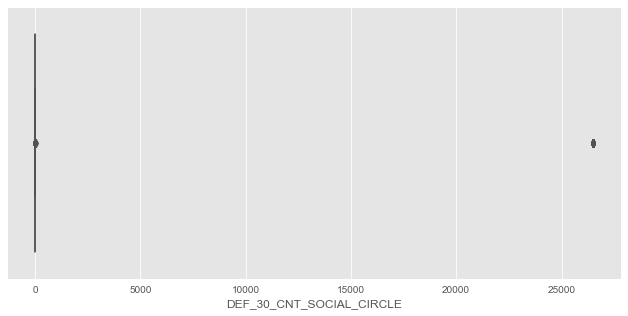

In [56]:
# Check for outliers 
print(application_df['DEF_30_CNT_SOCIAL_CIRCLE'].describe(percentiles=[0.01,0.1,0.25,0.5,0.75,0.99]))
print()
plt.style.use('ggplot')
plt.figure(figsize=(11,5))
sns.boxplot(application_df['DEF_30_CNT_SOCIAL_CIRCLE'],)
plt.show()

In [57]:
application_df['DEF_30_CNT_SOCIAL_CIRCLE'].skew()

17.26824413036996

In [58]:
mean = application_df.loc[application_df['DEF_30_CNT_SOCIAL_CIRCLE']<30.000000, 'DEF_30_CNT_SOCIAL_CIRCLE'].mean()
application_df.loc[application_df.DEF_30_CNT_SOCIAL_CIRCLE >30.000000, 'DEF_30_CNT_SOCIAL_CIRCLE'] = np.nan
application_df.fillna(mean,inplace=True)

In [59]:
application_df['DEF_30_CNT_SOCIAL_CIRCLE'].skew()

3.878431469737631

count    307511.000000
mean          0.143310
std           0.441757
min           0.000000
1%            0.000000
10%           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
99%           2.000000
max           8.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64



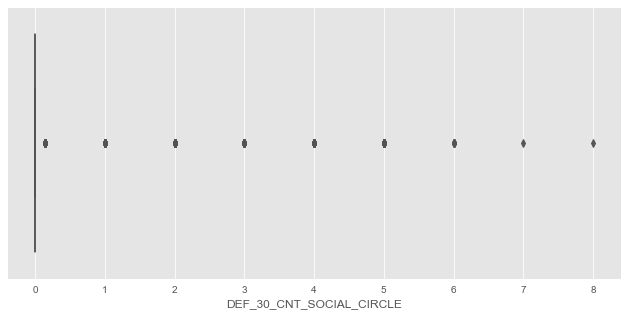

In [60]:
# Check for outliers 
print(application_df['DEF_30_CNT_SOCIAL_CIRCLE'].describe(percentiles=[0.01,0.1,0.25,0.5,0.75,0.99]))
print()
plt.style.use('ggplot')
plt.figure(figsize=(11,5))
sns.boxplot(application_df['DEF_30_CNT_SOCIAL_CIRCLE'],)
plt.show()

In [61]:
# next feature
print(application_df['OBS_60_CNT_SOCIAL_CIRCLE'].isnull().sum())

0


count    307511.000000
mean         89.381512
std        1524.269693
min           0.000000
1%            0.000000
10%           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
99%          11.000000
max       26498.619144
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64



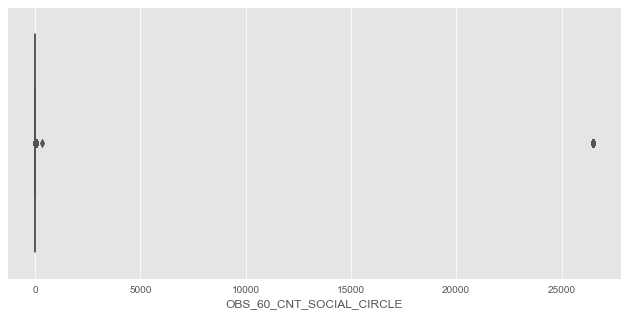

In [62]:
# Check for outliers
print(application_df['OBS_60_CNT_SOCIAL_CIRCLE'].describe(percentiles=[0.01,0.1,0.25,0.5,0.75,0.99]))
print()
plt.style.use('ggplot')
plt.figure(figsize=(11,5))
sns.boxplot(application_df['OBS_60_CNT_SOCIAL_CIRCLE'],)
plt.show()

In [63]:
mean = application_df.loc[application_df['OBS_60_CNT_SOCIAL_CIRCLE']<=10.000000, 'OBS_60_CNT_SOCIAL_CIRCLE'].mean()
application_df.loc[application_df.OBS_60_CNT_SOCIAL_CIRCLE == 344.000000, 'OBS_60_CNT_SOCIAL_CIRCLE'] = np.nan
application_df.fillna(mean,inplace=True)

count    307511.000000
mean         89.380398
std        1524.269632
min           0.000000
1%            0.000000
10%           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
99%          11.000000
max       26498.619144
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64



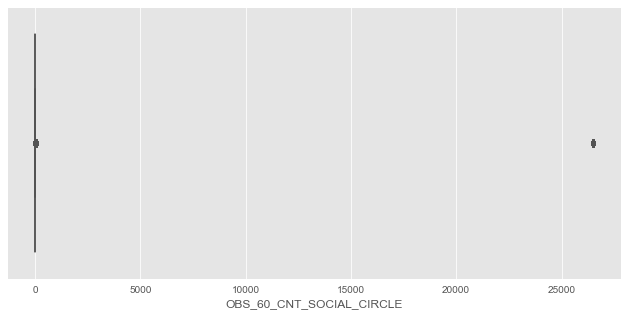

In [64]:
# Check for outliers 
print(application_df['OBS_60_CNT_SOCIAL_CIRCLE'].describe(percentiles=[0.01,0.1,0.25,0.5,0.75,0.99]))
print()
plt.style.use('ggplot')
plt.figure(figsize=(11,5))
sns.boxplot(application_df['OBS_60_CNT_SOCIAL_CIRCLE'],)
plt.show()

In [65]:
# now cleaning unknown values
# Filtering features who have missing values % between 0 and 49
columns = application_df.columns
numeric_columns = application_df._get_numeric_data().columns
categorical_columns = list(set(columns) - set(numeric_columns))
print(categorical_columns)

['OCCUPATION_TYPE', 'NAME_INCOME_TYPE', 'ORGANIZATION_TYPE', 'NAME_FAMILY_STATUS', 'FLAG_OWN_REALTY', 'FLAG_OWN_CAR', 'NAME_HOUSING_TYPE', 'CODE_GENDER', 'EMERGENCYSTATE_MODE', 'NAME_CONTRACT_TYPE', 'NAME_TYPE_SUITE', 'NAME_EDUCATION_TYPE', 'WEEKDAY_APPR_PROCESS_START']


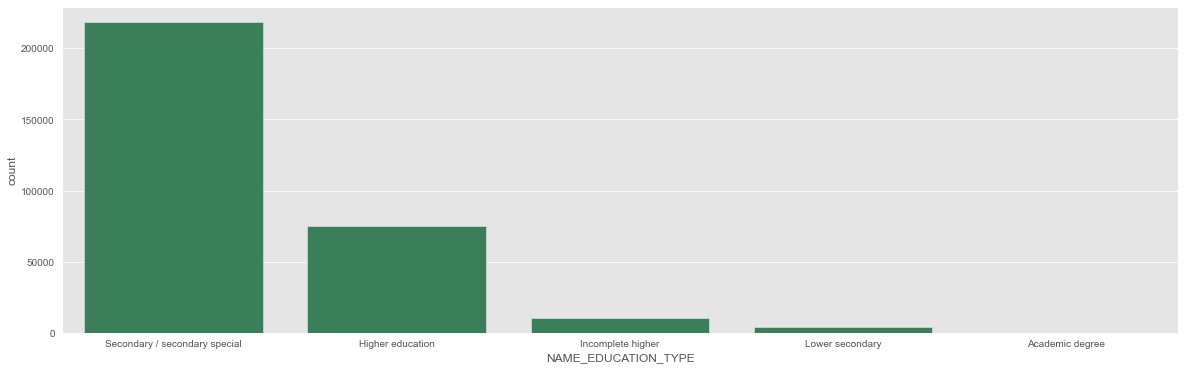

In [66]:
# Use a countplot to see the distribution of the column
plt.figure(figsize=(20,6))
a = sns.countplot(data=application_df, x='NAME_EDUCATION_TYPE', color='seagreen')
a.set_xticklabels(a.get_xticklabels(),rotation = 0)
plt.show()
# From this plot we can see that there are no unknown values

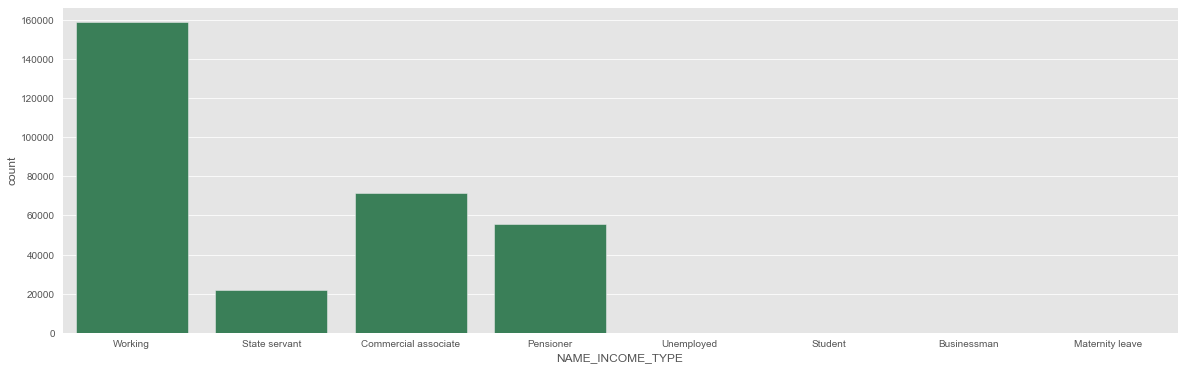

In [67]:
# Use a countplot to see the distribution of the column
plt.figure(figsize=(20,6))
a = sns.countplot(data=application_df, x='NAME_INCOME_TYPE', color='seagreen')
a.set_xticklabels(a.get_xticklabels(),rotation = 0)
plt.show()
# From this plot we can see that there are no unknown values

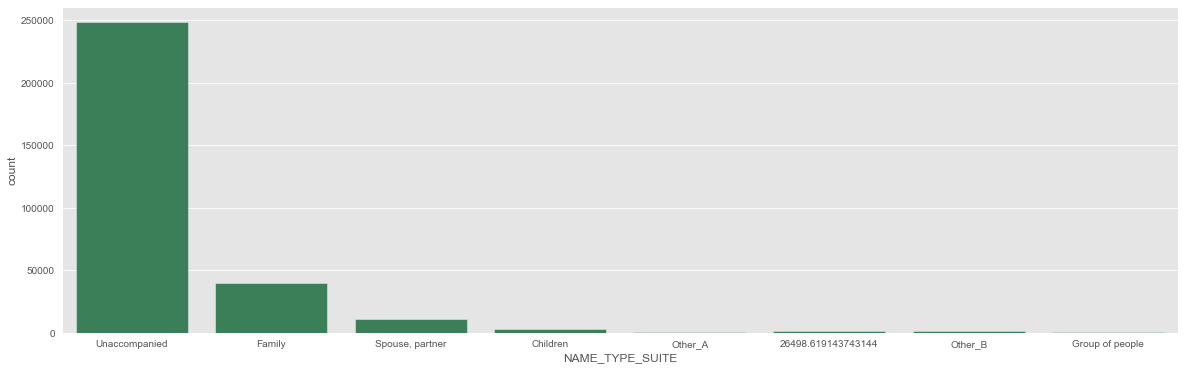

In [68]:
# Use a countplot to see the distribution of the column
plt.figure(figsize=(20,6))
a = sns.countplot(data=application_df, x='NAME_TYPE_SUITE', color='seagreen')
a.set_xticklabels(a.get_xticklabels(),rotation = 0)
plt.show()
# From this plot we can see that there are no unknown values

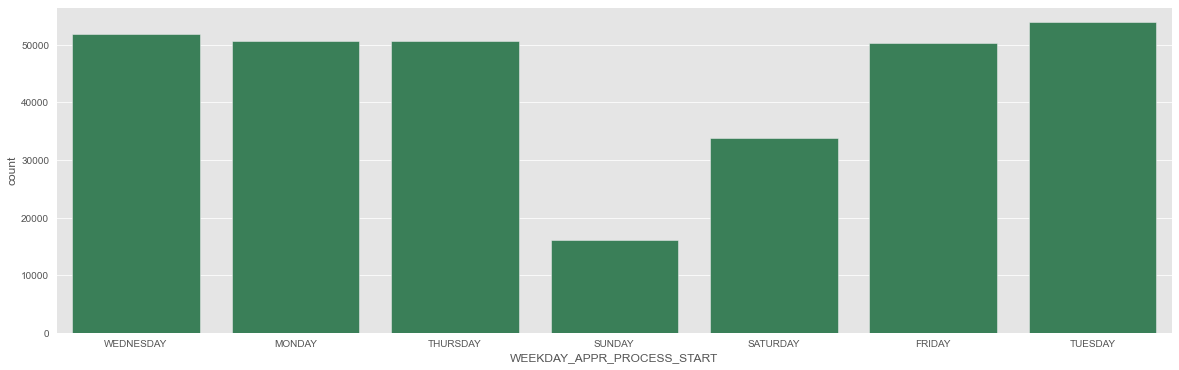

In [69]:
# Use a countplot to see the distribution of the column
plt.figure(figsize=(20,6))
a = sns.countplot(data=application_df, x='WEEKDAY_APPR_PROCESS_START', color='seagreen')
a.set_xticklabels(a.get_xticklabels(),rotation = 0)
plt.show()
# From this plot we can see that there are no unknown values

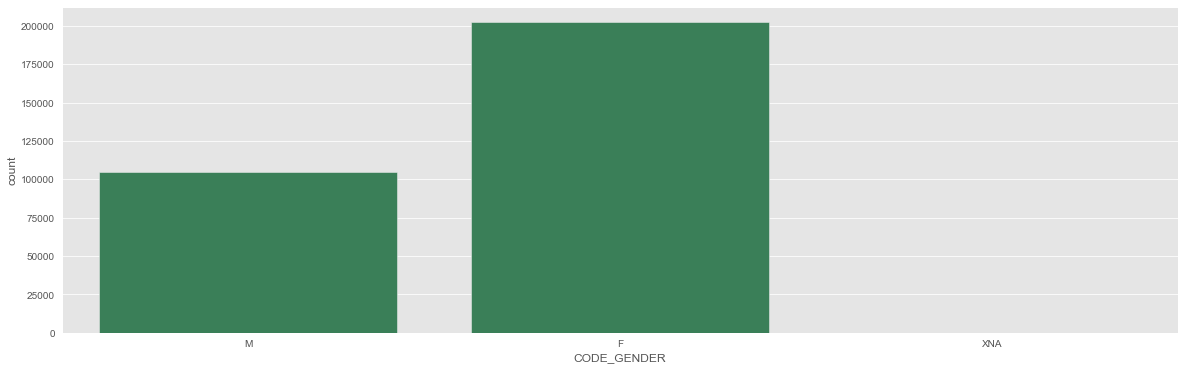

In [70]:
# Use a countplot to see the distribution of the column
plt.figure(figsize=(20,6))
a = sns.countplot(data=application_df, x='CODE_GENDER', color='seagreen')
a.set_xticklabels(a.get_xticklabels(),rotation = 0)
plt.show()
# From this plot we can see that there are few XNA values which we can replace with female the mode of the feature

In [71]:
# Change XNA value with female as it is mode and it will not have bias 
application_df['CODE_GENDER'] = application_df['CODE_GENDER'].apply(lambda x: 'F' if x == 'XNA' else x)

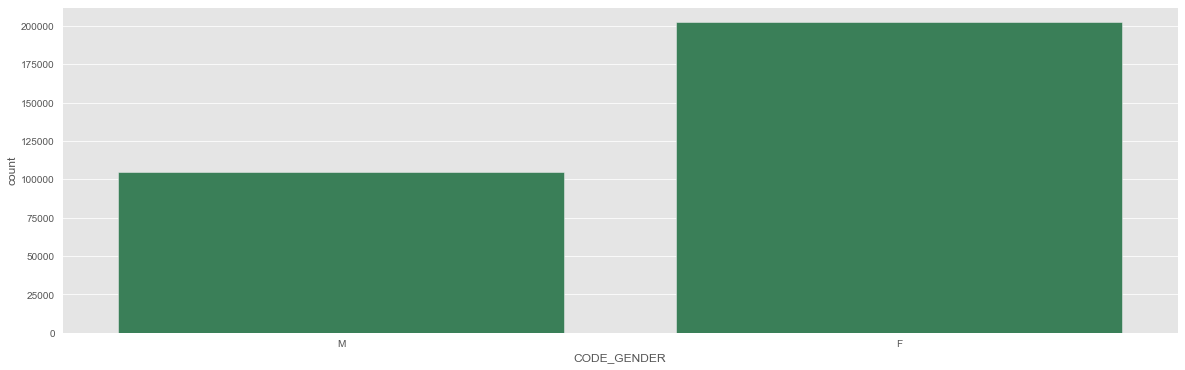

In [72]:
# Use a countplot to see the distribution of the column
plt.figure(figsize=(20,6))
a = sns.countplot(data=application_df, x='CODE_GENDER', color='seagreen')
a.set_xticklabels(a.get_xticklabels(),rotation = 0)
plt.show()

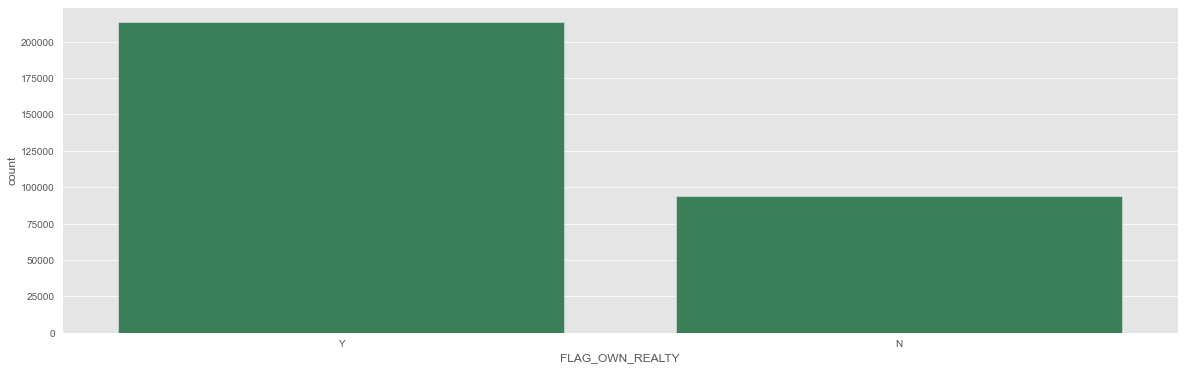

In [73]:
# Use a countplot to see the distribution of the features
plt.figure(figsize=(20,6))
a = sns.countplot(data=application_df, x='FLAG_OWN_REALTY', color='seagreen')
a.set_xticklabels(a.get_xticklabels(),rotation = 0)
plt.show()
# From this plot we can see that there are no unknown values

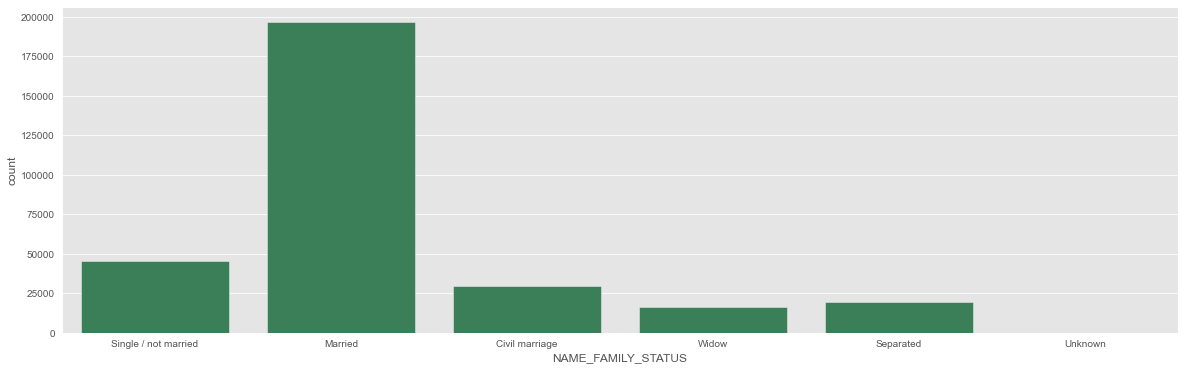

In [74]:
# Use a countplot to see the distribution of the column
plt.figure(figsize=(20,6))
a = sns.countplot(data=application_df, x='NAME_FAMILY_STATUS', color='seagreen')
a.set_xticklabels(a.get_xticklabels(),rotation = 0)
plt.show()
# From this plot we can see that there are few unknown values which are replaced by Married as it is the mode of the feature

In [75]:
# Change unknown value with married as it is mode and it will not contain bias in our data
application_df['NAME_FAMILY_STATUS'] = application_df['NAME_FAMILY_STATUS'].apply(lambda x: 'Married' if x == 'Unknown' else x)

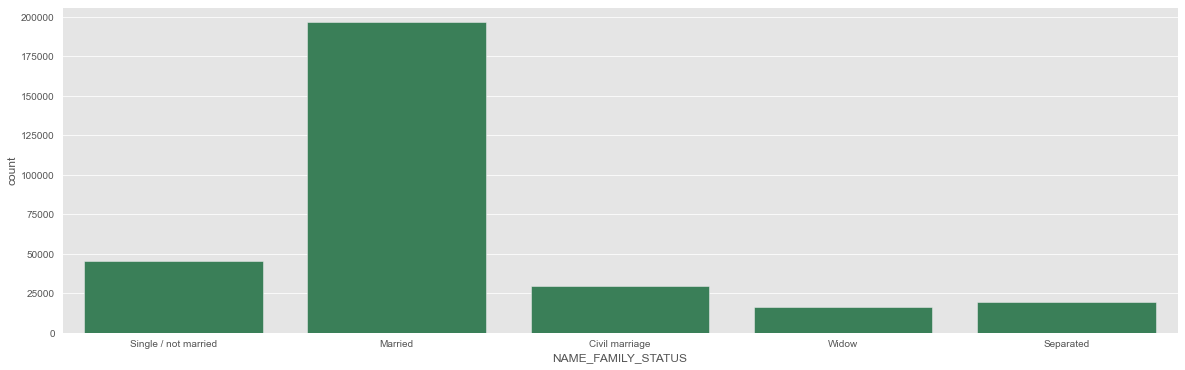

In [76]:
# Use a countplot to see the distribution of the column
plt.figure(figsize=(20,6))
a = sns.countplot(data=application_df, x='NAME_FAMILY_STATUS', color='seagreen')
a.set_xticklabels(a.get_xticklabels(),rotation = 0)
plt.show()

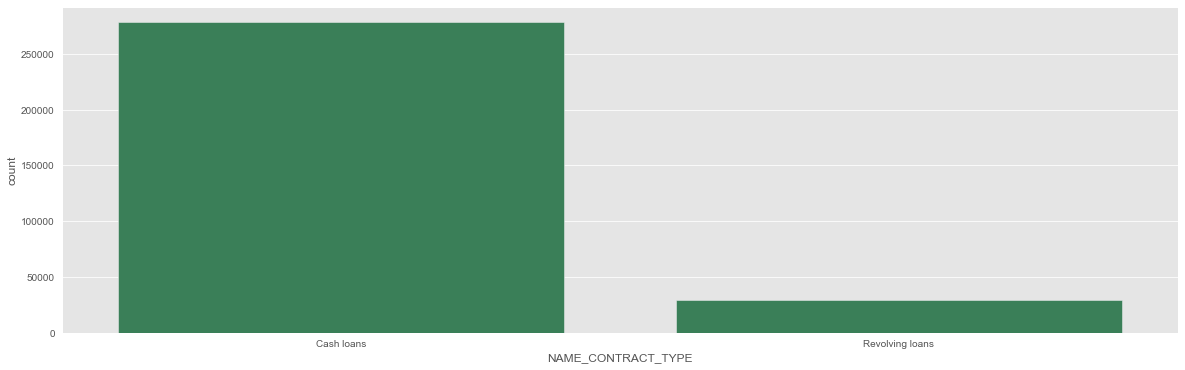

In [77]:
# Use a countplot to see the distribution of the feature
plt.figure(figsize=(20,6))
a = sns.countplot(data=application_df, x='NAME_CONTRACT_TYPE', color='seagreen')
a.set_xticklabels(a.get_xticklabels(),rotation = 0)
plt.show()
# From this plot we can see that there are no unknown values

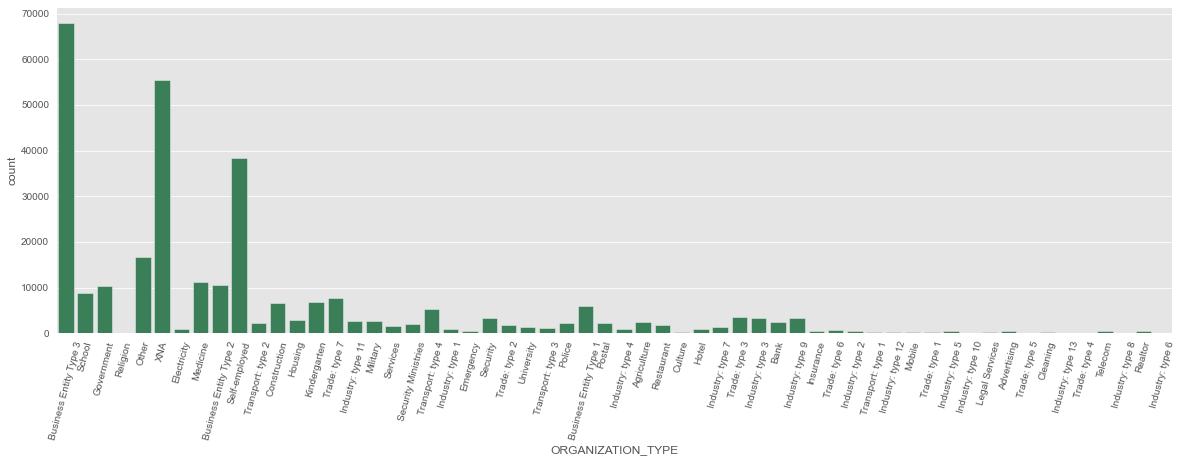

In [78]:
# Use a countplot to see the distribution of the feature
plt.figure(figsize=(20,6))
a = sns.countplot(data=application_df, x='ORGANIZATION_TYPE', color='seagreen')
a.set_xticklabels(a.get_xticklabels(),rotation = 75)
plt.show()
# From the plot we know it has XNA elements but it's more than 50000 hence we leave it as it, as it may introduce bias in our dataset

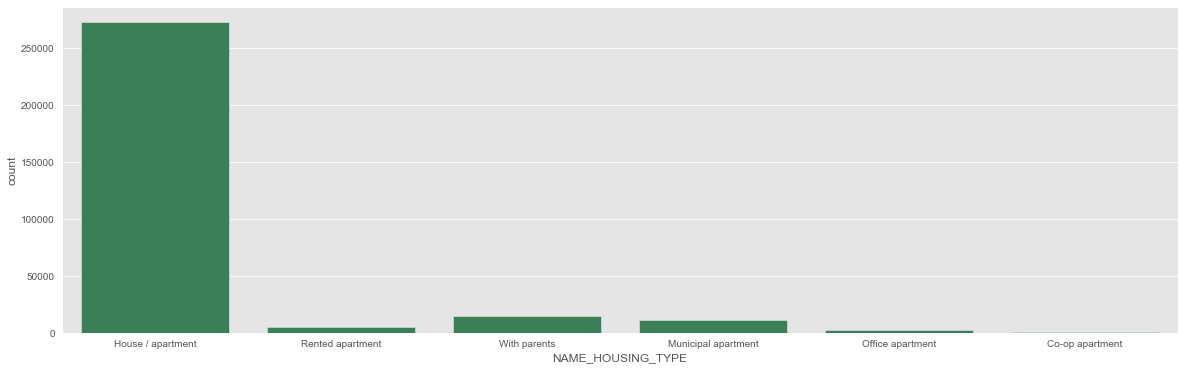

In [79]:
# Use a countplot to see the distribution of the feature
plt.figure(figsize=(20,6))
a = sns.countplot(data=application_df, x='NAME_HOUSING_TYPE', color='seagreen')
a.set_xticklabels(a.get_xticklabels(),rotation = 0)
plt.show()
# From the plot we know it has no unknown values

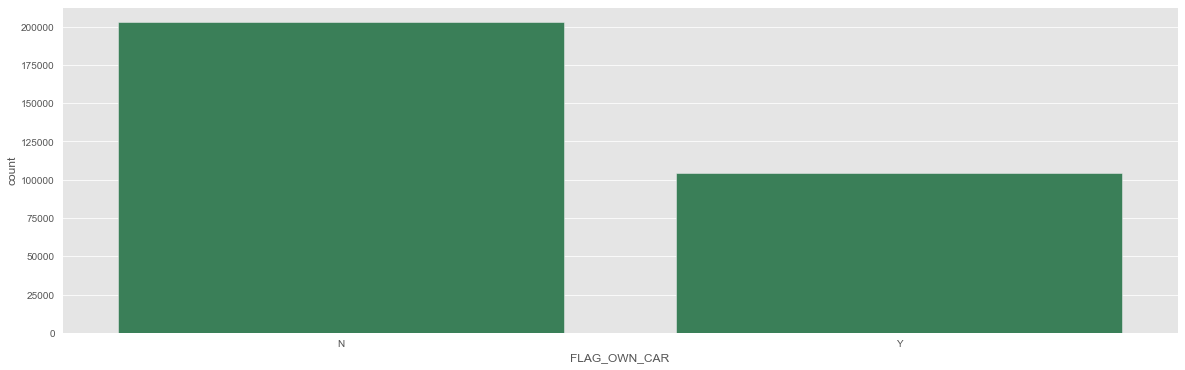

In [80]:
# Use a countplot to see the distribution of the column
plt.figure(figsize=(20,6))
a = sns.countplot(data=application_df, x='FLAG_OWN_CAR', color='seagreen')
a.set_xticklabels(a.get_xticklabels(),rotation = 0)
plt.show()
# From the plot we know it has no unknown values

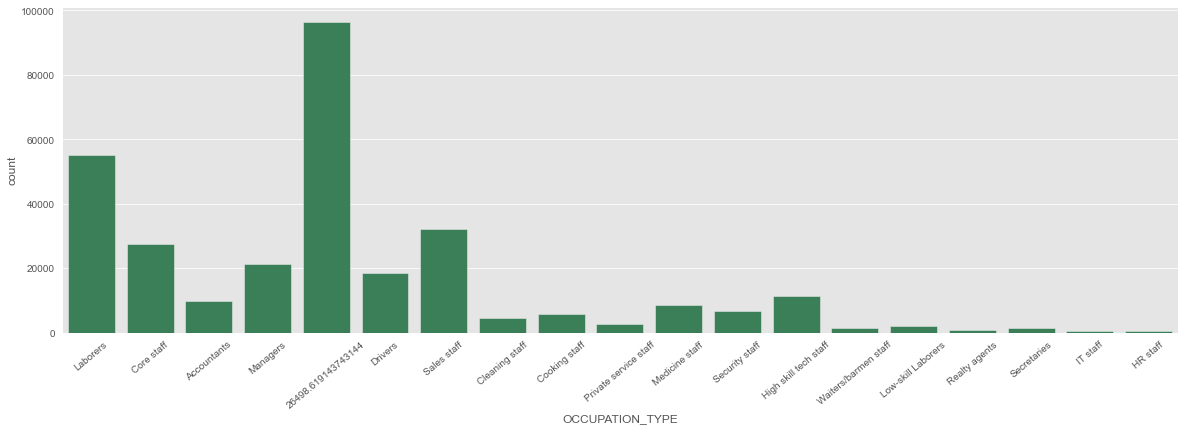

In [81]:
# Use a countplot to see the distribution of the column
plt.figure(figsize=(20,6))
a = sns.countplot(data=application_df, x='OCCUPATION_TYPE', color='seagreen')
a.set_xticklabels(a.get_xticklabels(),rotation = 40)
plt.show()
# From the plot we know there are no unknown values for this feature

In [82]:
# Now we will check if we have columns with negative values
negative_columns = []
for i in numeric_columns:
    if(application_df[i].mean()<0):
        negative_columns.append(application_df[i])
print(negative_columns)

[0         -9461
1        -16765
2        -19046
3        -19005
4        -19932
          ...  
307506    -9327
307507   -20775
307508   -14966
307509   -11961
307510   -16856
Name: DAYS_BIRTH, Length: 307511, dtype: int64, 0        -3648.0
1        -1186.0
2        -4260.0
3        -9833.0
4        -4311.0
           ...  
307506   -8456.0
307507   -4388.0
307508   -6737.0
307509   -2562.0
307510   -5128.0
Name: DAYS_REGISTRATION, Length: 307511, dtype: float64, 0        -2120
1         -291
2        -2531
3        -2437
4        -3458
          ... 
307506   -1982
307507   -4090
307508   -5150
307509    -931
307510    -410
Name: DAYS_ID_PUBLISH, Length: 307511, dtype: int64, 0        -1134.0
1         -828.0
2         -815.0
3         -617.0
4        -1106.0
           ...  
307506    -273.0
307507       0.0
307508   -1909.0
307509    -322.0
307510    -787.0
Name: DAYS_LAST_PHONE_CHANGE, Length: 307511, dtype: float64]


In [83]:
# We have total 4 columns with negative data, we will change it in positive value
application_df['DAYS_BIRTH'] = abs(application_df['DAYS_BIRTH'])
application_df['DAYS_ID_PUBLISH'] = abs(application_df['DAYS_ID_PUBLISH'])
application_df['DAYS_LAST_PHONE_CHANGE'] = abs(application_df['DAYS_LAST_PHONE_CHANGE'])
application_df['DAYS_REGISTRATION'] = abs(application_df['DAYS_REGISTRATION'])

In [84]:
# Now we will re check if we have columns with negative values
negative_columns = []
for i in numeric_columns:
    if(application_df[i].mean()<0):
        negative_columns.append(application_df[i])
print(negative_columns)

[]


In [85]:
# Now we don't have missing values, outliers, unknown values or negative values in application_df

In [86]:
conversion_column_list = ['FLAG_OWN_CAR','FLAG_OWN_REALTY']

In [87]:
# Defining the map function
def conversion_map(x):
    return x.map({'Y': 1, "N": 0})

In [88]:
application_df[conversion_column_list] = application_df[conversion_column_list].apply(conversion_map)

In [89]:
# Filtering columns who have missing values % between 0 and 40
columns = prev_df.columns[((prev_df.isnull().sum() / len(prev_df) * 100) <= 40)]
print(columns)
print(len(columns))

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')
26


In [90]:
numeric_columns_prev = prev_df._get_numeric_data().columns
print(numeric_columns_prev)
print(len(numeric_columns_prev))

Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START',
       'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION', 'SELLERPLACE_AREA',
       'CNT_PAYMENT'],
      dtype='object')
11


In [91]:
columns_prev = prev_df.columns
categorical_columns_prev = list(set(columns_prev) - set(numeric_columns_prev))
print(categorical_columns_prev)
print(len(categorical_columns_prev))

['NAME_PORTFOLIO', 'NAME_PAYMENT_TYPE', 'CHANNEL_TYPE', 'NAME_YIELD_GROUP', 'NAME_SELLER_INDUSTRY', 'NAME_CLIENT_TYPE', 'CODE_REJECT_REASON', 'NAME_PRODUCT_TYPE', 'PRODUCT_COMBINATION', 'NAME_GOODS_CATEGORY', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_TYPE', 'NAME_CONTRACT_STATUS', 'FLAG_LAST_APPL_PER_CONTRACT', 'WEEKDAY_APPR_PROCESS_START']
15


In [92]:
#Checking missing values, outliers in numeric columns
print(prev_df['AMT_ANNUITY'].isnull().sum())

372235


count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
10%      3.817530e+03
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
99%      6.968579e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64



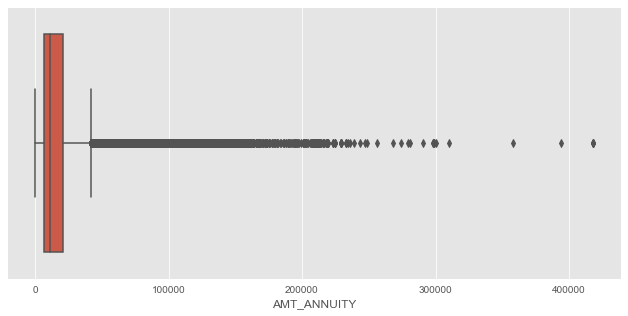

In [93]:
# Check for outliers using statistical summary for the column
print(prev_df['AMT_ANNUITY'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]))
print()
plt.style.use('ggplot')
plt.figure(figsize=(11,5))
sns.boxplot(prev_df['AMT_ANNUITY'])
plt.show()

In [94]:
prev_df['AMT_ANNUITY'].skew() # here we can see our data is highly skewed

2.6925715126729455

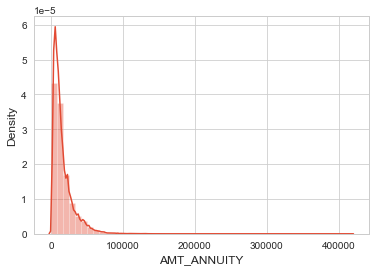

In [95]:
sns.set_style('whitegrid') 
sns.distplot(prev_df['AMT_ANNUITY']) 
plt.show()

In [96]:
mean = prev_df.loc[prev_df['AMT_ANNUITY']<6.968579e+04, 'AMT_ANNUITY'].mean()
prev_df.loc[prev_df.AMT_ANNUITY > 6.968579e+04, 'AMT_ANNUITY'] = np.nan
prev_df.fillna(mean,inplace=True)

count    1.670214e+06
mean     1.520742e+04
std      1.104887e+04
min      0.000000e+00
10%      4.363110e+03
25%      7.547096e+03
50%      1.520742e+04
75%      1.639778e+04
99%      5.624766e+04
max      6.968515e+04
Name: AMT_ANNUITY, dtype: float64



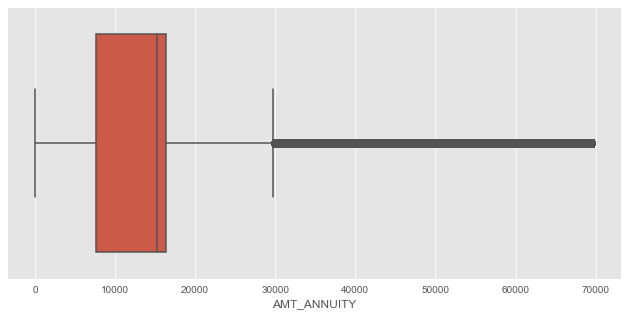

In [97]:
# Check for outliers using statistical summary for the column
print(prev_df['AMT_ANNUITY'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]))
print()
plt.style.use('ggplot')
plt.figure(figsize=(11,5))
sns.boxplot(prev_df['AMT_ANNUITY'])
plt.show()

In [98]:
prev_df['AMT_ANNUITY'].skew()

1.814630193902028

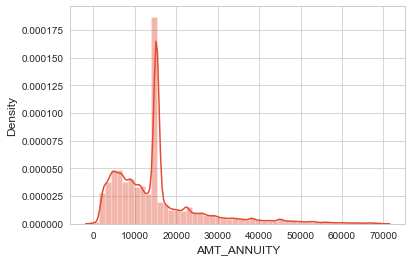

In [99]:
sns.set_style('whitegrid') 
sns.distplot(prev_df['AMT_ANNUITY']) 
plt.show()

In [100]:
# next column
print(prev_df['AMT_APPLICATION'].isnull().sum())

0


count    1.670214e+06
mean     1.752339e+05
std      2.927798e+05
min      0.000000e+00
10%      0.000000e+00
25%      1.872000e+04
50%      7.104600e+04
75%      1.803600e+05
99%      1.350000e+06
max      6.905160e+06
Name: AMT_APPLICATION, dtype: float64



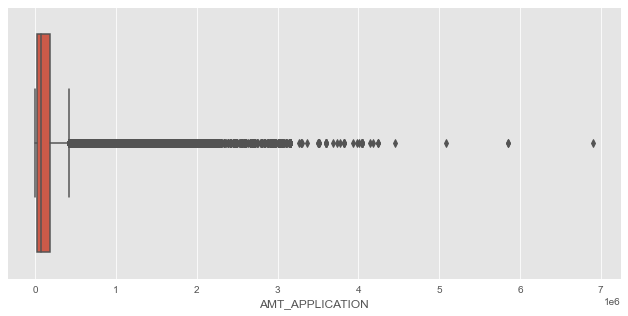

In [101]:
# Check for outliers
print(prev_df['AMT_APPLICATION'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]))
print()
plt.style.use('ggplot')
plt.figure(figsize=(11,5))
sns.boxplot(prev_df['AMT_APPLICATION'])
plt.show()

In [102]:
prev_df['AMT_APPLICATION'].skew()

3.391442176069141

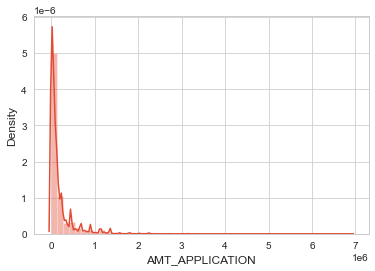

In [103]:
sns.set_style('whitegrid') 
sns.distplot(prev_df['AMT_APPLICATION']) 
plt.show()

In [104]:
mean = prev_df.loc[prev_df['AMT_APPLICATION']< 1.350000e+06, 'AMT_APPLICATION'].mean()
prev_df.loc[prev_df.AMT_APPLICATION > 1.350000e+06, 'AMT_APPLICATION'] = np.nan
prev_df.fillna(mean,inplace=True)

In [105]:
prev_df['AMT_APPLICATION'].skew()

2.6209881644486352

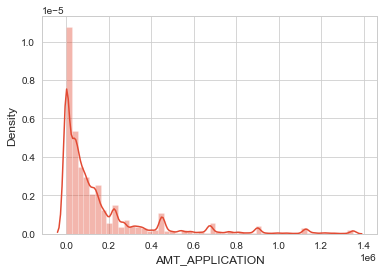

In [106]:
sns.set_style('whitegrid') 
sns.distplot(prev_df['AMT_APPLICATION']) 
plt.show()

count    1.670214e+06
mean     1.594653e+05
std      2.416677e+05
min      0.000000e+00
10%      0.000000e+00
25%      1.872000e+04
50%      7.104600e+04
75%      1.800000e+05
99%      1.170000e+06
max      1.350000e+06
Name: AMT_APPLICATION, dtype: float64



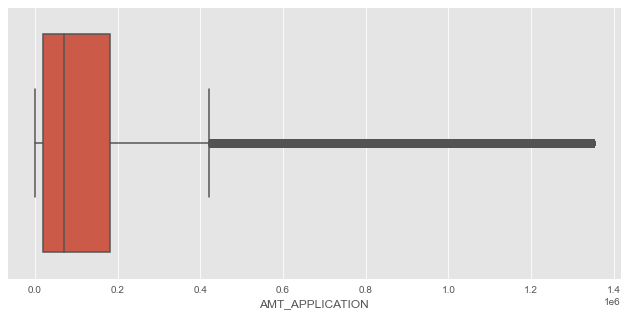

In [107]:
# Check for outliers
print(prev_df['AMT_APPLICATION'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]))
print()
plt.style.use('ggplot')
plt.figure(figsize=(11,5))
sns.boxplot(prev_df['AMT_APPLICATION'])
plt.show()

In [108]:
# next feature
print(prev_df['AMT_CREDIT'].isnull().sum())

0


count    1.670214e+06
mean     1.961139e+05
std      3.185746e+05
min      0.000000e+00
10%      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
99%      1.515375e+06
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64



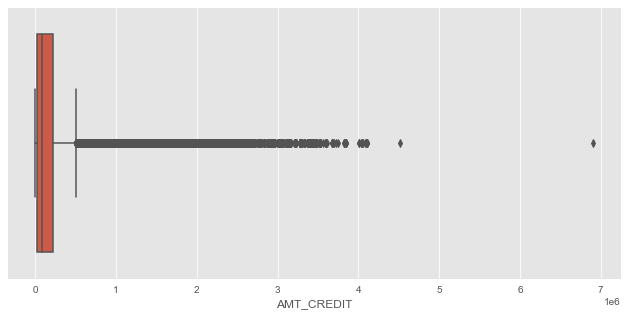

In [109]:
# Check for outliers
print(prev_df['AMT_CREDIT'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]))
print()
plt.style.use('ggplot')
plt.figure(figsize=(11,5))
sns.boxplot(prev_df['AMT_CREDIT'])
plt.show()

In [110]:
prev_df['AMT_CREDIT'].skew()

3.2458155915636078

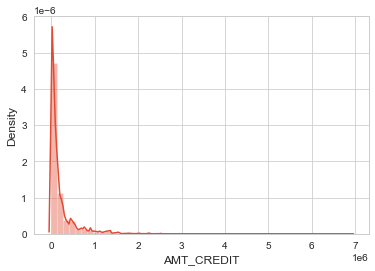

In [111]:
sns.set_style('whitegrid') 
sns.distplot(prev_df['AMT_CREDIT']) 
plt.show()

In [112]:
mean = prev_df.loc[prev_df['AMT_CREDIT']< 1.515375e+06, 'AMT_CREDIT'].mean()
prev_df.loc[prev_df.AMT_CREDIT > 1.515375e+06, 'AMT_CREDIT'] = np.nan
prev_df.fillna(mean,inplace=True)

In [113]:
prev_df['AMT_CREDIT'].skew()

2.499883835615708

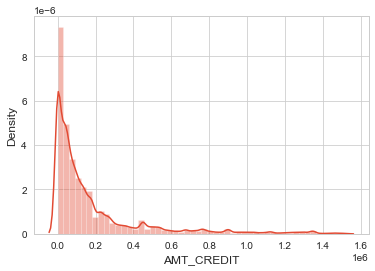

In [114]:
sns.set_style('whitegrid') 
sns.distplot(prev_df['AMT_CREDIT']) 
plt.show()

count    1.670214e+06
mean     1.785675e+05
std      2.630692e+05
min      0.000000e+00
10%      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.025000e+05
99%      1.293502e+06
max      1.515100e+06
Name: AMT_CREDIT, dtype: float64



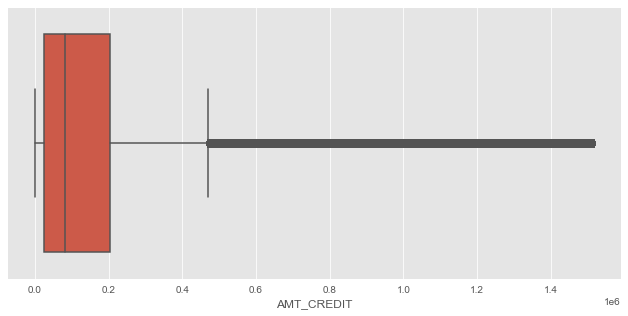

In [115]:
# Check for outliers
print(prev_df['AMT_CREDIT'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]))
print()
plt.style.use('ggplot')
plt.figure(figsize=(11,5))
sns.boxplot(prev_df['AMT_CREDIT'])
plt.show()

In [116]:
# next column
print(prev_df['AMT_GOODS_PRICE'].isnull().sum())

0


count    1.670214e+06
mean     1.787662e+05
std      2.907611e+05
min      0.000000e+00
10%      1.520742e+04
25%      1.872000e+04
50%      7.105050e+04
75%      1.804050e+05
99%      1.350000e+06
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64



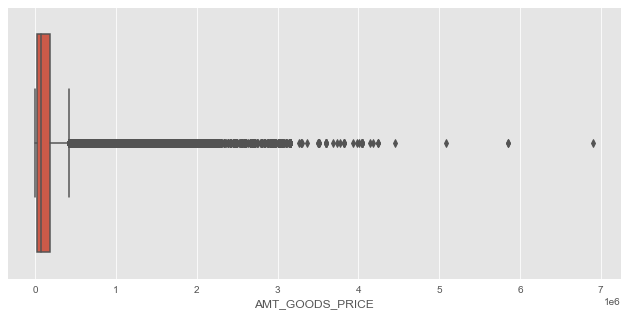

In [117]:
# Check for outliers
print(prev_df['AMT_GOODS_PRICE'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]))
print()
plt.style.use('ggplot')
plt.figure(figsize=(11,5))
sns.boxplot(prev_df['AMT_GOODS_PRICE'])
plt.show()

In [118]:
prev_df['AMT_GOODS_PRICE'].skew()

3.4384609349638184

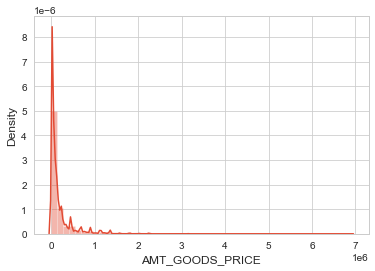

In [119]:
sns.set_style('whitegrid') 
sns.distplot(prev_df['AMT_GOODS_PRICE']) 
plt.show()

In [120]:
an = prev_df.loc[prev_df['AMT_GOODS_PRICE']<1.350000e+06, 'AMT_GOODS_PRICE'].mean()
prev_df.loc[prev_df.AMT_GOODS_PRICE > 1.350000e+06, 'AMT_GOODS_PRICE'] = np.nan
prev_df.fillna(mean,inplace=True)

In [121]:
prev_df['AMT_GOODS_PRICE'].skew()

2.665366051963433

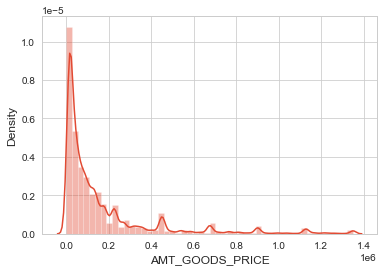

In [122]:
sns.set_style('whitegrid') 
sns.distplot(prev_df['AMT_GOODS_PRICE']) 
plt.show()

count    1.670214e+06
mean     1.632378e+05
std      2.394537e+05
min      0.000000e+00
10%      1.520742e+04
25%      1.872000e+04
50%      7.105050e+04
75%      1.800000e+05
99%      1.170000e+06
max      1.350000e+06
Name: AMT_GOODS_PRICE, dtype: float64



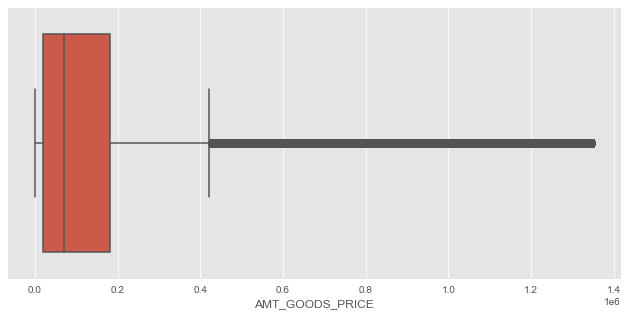

In [123]:
# Check for outliers
print(prev_df['AMT_GOODS_PRICE'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]))
print()
plt.style.use('ggplot')
plt.figure(figsize=(11,5))
sns.boxplot(prev_df['AMT_GOODS_PRICE'])
plt.show()

In [124]:
# next feature
print(prev_df['HOUR_APPR_PROCESS_START'].isnull().sum())

0


count    1.670214e+06
mean     1.248418e+01
std      3.334028e+00
min      0.000000e+00
10%      8.000000e+00
25%      1.000000e+01
50%      1.200000e+01
75%      1.500000e+01
99%      2.000000e+01
max      2.300000e+01
Name: HOUR_APPR_PROCESS_START, dtype: float64



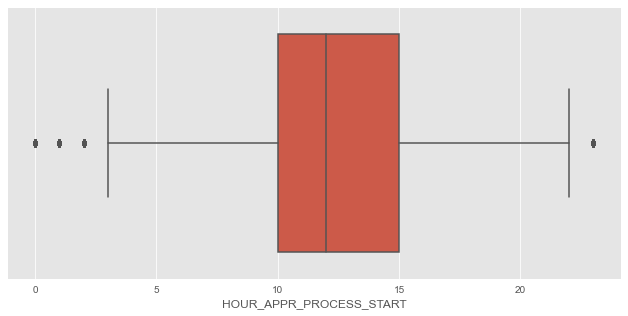

In [125]:
# Check for outliers
print(prev_df['HOUR_APPR_PROCESS_START'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]))
print()
plt.style.use('ggplot')
plt.figure(figsize=(11,5))
sns.boxplot(prev_df['HOUR_APPR_PROCESS_START'])
plt.show()

In [126]:
prev_df['HOUR_APPR_PROCESS_START'].skew()

-0.025629249149888886

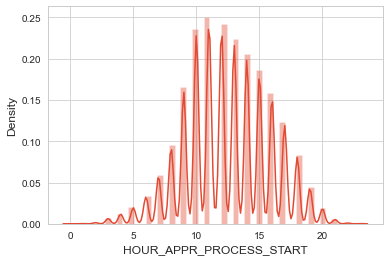

In [127]:
sns.set_style('whitegrid') 
sns.distplot(prev_df['HOUR_APPR_PROCESS_START']) 
plt.show()

In [128]:
mean = prev_df.loc[prev_df['HOUR_APPR_PROCESS_START']<2.000000e+01, 'HOUR_APPR_PROCESS_START'].mean()
prev_df.loc[prev_df.HOUR_APPR_PROCESS_START > 2.000000e+01, 'HOUR_APPR_PROCESS_START'] = np.nan
prev_df.loc[prev_df.HOUR_APPR_PROCESS_START < 8.000000e+00, 'HOUR_APPR_PROCESS_START'] = np.nan
prev_df.fillna(mean,inplace=True)

In [129]:
prev_df['HOUR_APPR_PROCESS_START'].skew()

0.3413967147798488

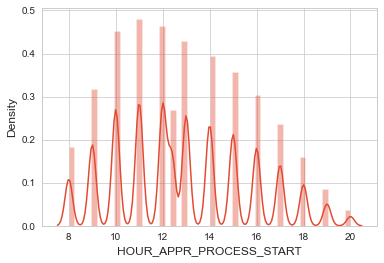

In [130]:
sns.set_style('whitegrid') 
sns.distplot(prev_df['HOUR_APPR_PROCESS_START']) 
plt.show()

count    1.670214e+06
mean     1.285608e+01
std      2.826412e+00
min      8.000000e+00
10%      9.000000e+00
25%      1.100000e+01
50%      1.239150e+01
75%      1.500000e+01
99%      1.900000e+01
max      2.000000e+01
Name: HOUR_APPR_PROCESS_START, dtype: float64



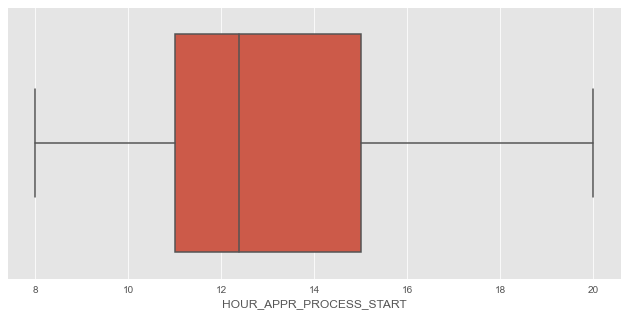

In [131]:
# Check for outliers
print(prev_df['HOUR_APPR_PROCESS_START'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]))
print()
plt.style.use('ggplot')
plt.figure(figsize=(11,5))
sns.boxplot(prev_df['HOUR_APPR_PROCESS_START'])
plt.show()

In [132]:
# next feature
print(prev_df['NFLAG_LAST_APPL_IN_DAY'].isnull().sum())

0


count    1.670214e+06
mean     9.964675e-01
std      5.932963e-02
min      0.000000e+00
10%      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
99%      1.000000e+00
max      1.000000e+00
Name: NFLAG_LAST_APPL_IN_DAY, dtype: float64



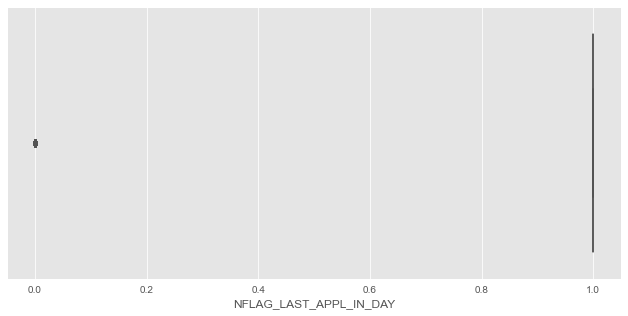

In [133]:
# Check for outliers using statistical summary for the column
print(prev_df['NFLAG_LAST_APPL_IN_DAY'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]))
print()
plt.style.use('ggplot')
plt.figure(figsize=(11,5))
sns.boxplot(prev_df['NFLAG_LAST_APPL_IN_DAY'])
plt.show()

In [134]:
prev_df['NFLAG_LAST_APPL_IN_DAY'].value_counts() #hence it's a binary field, we will not be changing any values

1    1664314
0       5900
Name: NFLAG_LAST_APPL_IN_DAY, dtype: int64

In [135]:
# next feature
print(prev_df['DAYS_DECISION'].isnull().sum())

0


count    1.670214e+06
mean    -8.806797e+02
std      7.790997e+02
min     -2.922000e+03
10%     -2.250000e+03
25%     -1.300000e+03
50%     -5.810000e+02
75%     -2.800000e+02
99%     -1.400000e+01
max     -1.000000e+00
Name: DAYS_DECISION, dtype: float64



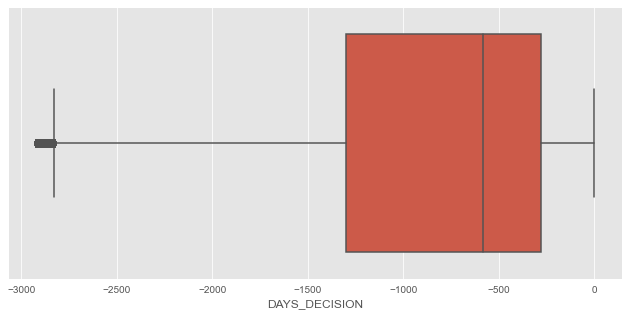

In [136]:
# Check for outliers 
print(prev_df['DAYS_DECISION'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]))
print()
plt.style.use('ggplot')
plt.figure(figsize=(11,5))
sns.boxplot(prev_df['DAYS_DECISION'])
plt.show()

In [137]:
# Since it's mean is negative converting it into positive values
prev_df['DAYS_DECISION'] = abs(prev_df['DAYS_DECISION'])

count    1.670214e+06
mean     8.806797e+02
std      7.790997e+02
min      1.000000e+00
10%      1.520000e+02
25%      2.800000e+02
50%      5.810000e+02
75%      1.300000e+03
99%      2.835000e+03
max      2.922000e+03
Name: DAYS_DECISION, dtype: float64



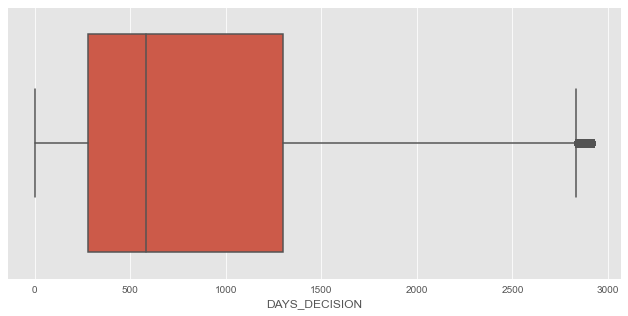

In [138]:
# Check for outliers
print(prev_df['DAYS_DECISION'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]))
print()
plt.style.use('ggplot')
plt.figure(figsize=(11,5))
sns.boxplot(prev_df['DAYS_DECISION'])
plt.show()

In [139]:
# next feature
print(prev_df['SELLERPLACE_AREA'].isnull().sum())

0


count    1.670214e+06
mean     3.139511e+02
std      7.127443e+03
min     -1.000000e+00
10%     -1.000000e+00
25%     -1.000000e+00
50%      3.000000e+00
75%      8.200000e+01
99%      3.570000e+03
max      4.000000e+06
Name: SELLERPLACE_AREA, dtype: float64



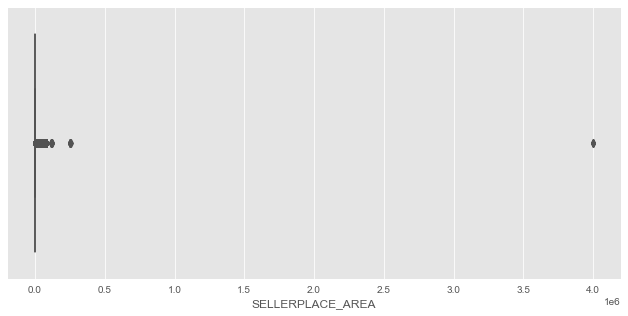

In [140]:
# Check for outliers using statistical summary for the column
print(prev_df['SELLERPLACE_AREA'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]))
print()
plt.style.use('ggplot')
plt.figure(figsize=(11,5))
sns.boxplot(prev_df['SELLERPLACE_AREA'])
plt.show()

In [141]:
prev_df['SELLERPLACE_AREA'] = abs(prev_df['SELLERPLACE_AREA'])

count    1.670214e+06
mean     3.148644e+02
std      7.127403e+03
min      0.000000e+00
10%      1.000000e+00
25%      1.000000e+00
50%      3.000000e+00
75%      8.200000e+01
99%      3.570000e+03
max      4.000000e+06
Name: SELLERPLACE_AREA, dtype: float64



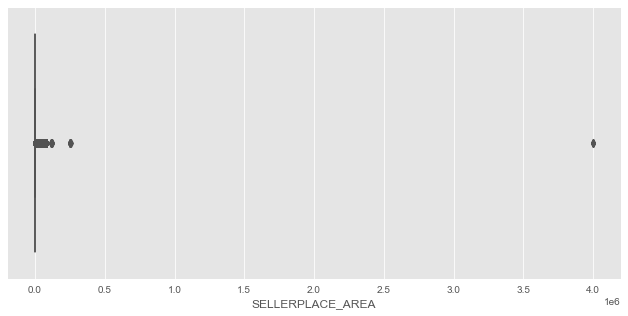

In [142]:
# Check for outliers using statistical summary for the column
print(prev_df['SELLERPLACE_AREA'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]))
print()
plt.style.use('ggplot')
plt.figure(figsize=(11,5))
sns.boxplot(prev_df['SELLERPLACE_AREA'])
plt.show()

In [143]:
mean = prev_df.loc[prev_df['SELLERPLACE_AREA']< 3.570000e+03, 'SELLERPLACE_AREA'].mean()
prev_df.loc[prev_df.SELLERPLACE_AREA > 3.570000e+03, 'SELLERPLACE_AREA'] = np.nan
prev_df.fillna(mean,inplace=True)

count    1.670214e+06
mean     2.173833e+02
std      5.674390e+02
min      0.000000e+00
10%      1.000000e+00
25%      1.000000e+00
50%      3.000000e+00
75%      8.200000e+01
99%      2.972000e+03
max      3.570000e+03
Name: SELLERPLACE_AREA, dtype: float64



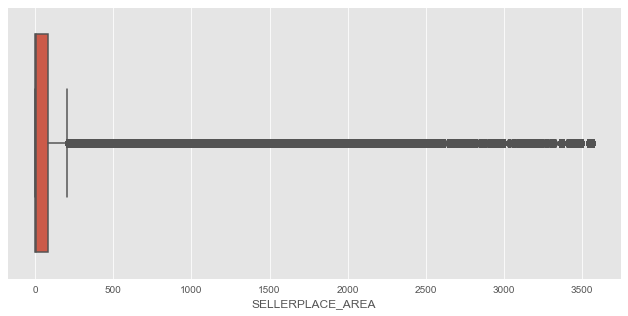

In [144]:
# Check for outliers using statistical summary for the column
print(prev_df['SELLERPLACE_AREA'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]))
print()
plt.style.use('ggplot')
plt.figure(figsize=(11,5))
sns.boxplot(prev_df['SELLERPLACE_AREA'])
plt.show()

In [145]:
# next feature
print(prev_df['CNT_PAYMENT'].isnull().sum())

0


count    1.670214e+06
mean     3.401658e+03
std      6.322169e+03
min      0.000000e+00
10%      4.000000e+00
25%      1.000000e+01
50%      1.200000e+01
75%      6.000000e+01
99%      1.520742e+04
max      1.520742e+04
Name: CNT_PAYMENT, dtype: float64



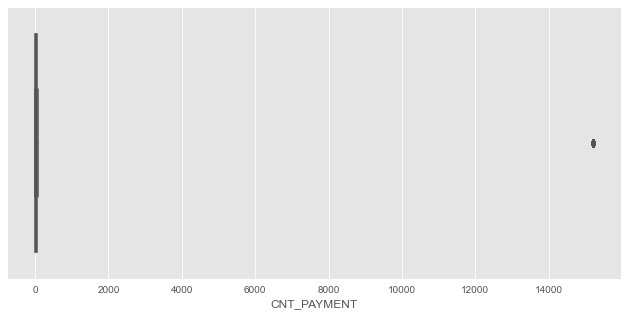

In [146]:
# Check for outliers using statistical summary for the column
print(prev_df['CNT_PAYMENT'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]))
print()
plt.style.use('ggplot')
plt.figure(figsize=(11,5))
sns.boxplot(prev_df['CNT_PAYMENT'])
plt.show()

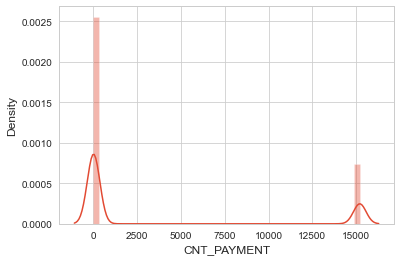

In [147]:
sns.set_style('whitegrid') 
sns.distplot(prev_df['CNT_PAYMENT']) 
plt.show()

In [148]:
prev_df['CNT_PAYMENT'].skew()

1.3318361141364616

In [149]:
mean = prev_df.loc[prev_df['CNT_PAYMENT']< 1.534230e+05, 'CNT_PAYMENT'].mean()
prev_df.loc[prev_df.CNT_PAYMENT > 1.534230e+05, 'CNT_PAYMENT'] = np.nan
prev_df.fillna(mean,inplace=True)

In [150]:
prev_df['CNT_PAYMENT'].skew()

1.3318361141364616

count    1.670214e+06
mean     3.401658e+03
std      6.322169e+03
min      0.000000e+00
10%      4.000000e+00
25%      1.000000e+01
50%      1.200000e+01
75%      6.000000e+01
99%      1.520742e+04
max      1.520742e+04
Name: CNT_PAYMENT, dtype: float64



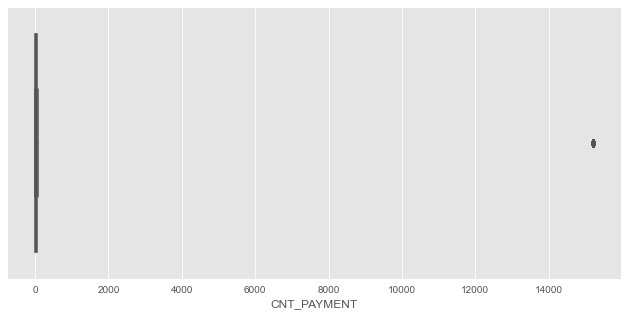

In [151]:
# Check for outliers using statistical summary for the column
print(prev_df['CNT_PAYMENT'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]))
print()
plt.style.use('ggplot')
plt.figure(figsize=(11,5))
sns.boxplot(prev_df['CNT_PAYMENT'])
plt.show()

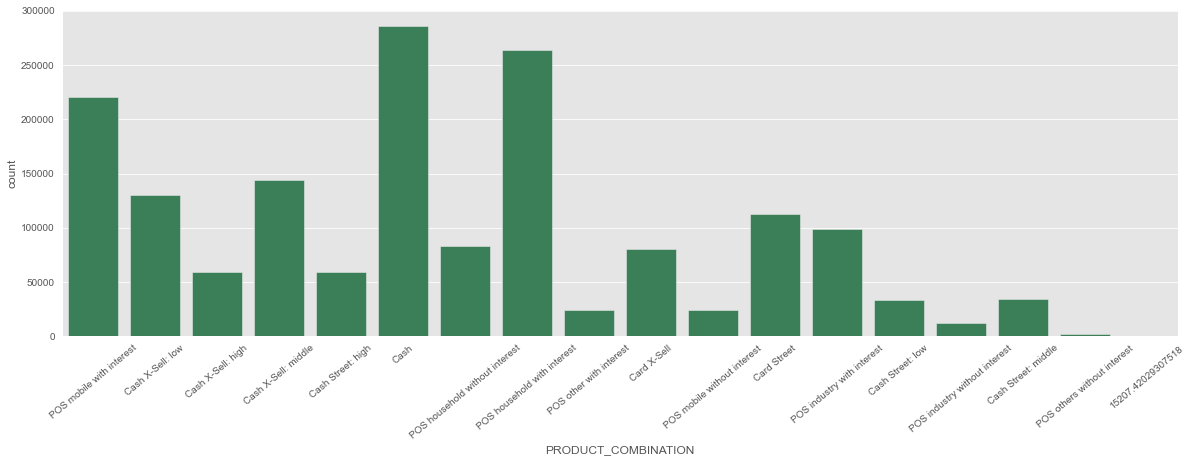

In [152]:
# Use a countplot to see the distribution of the column
plt.figure(figsize=(20,6))
a = sns.countplot(data=prev_df, x='PRODUCT_COMBINATION', color='seagreen')
a.set_xticklabels(a.get_xticklabels(),rotation = 40)
plt.show()
# From plot we know there are no unknown values of this feature

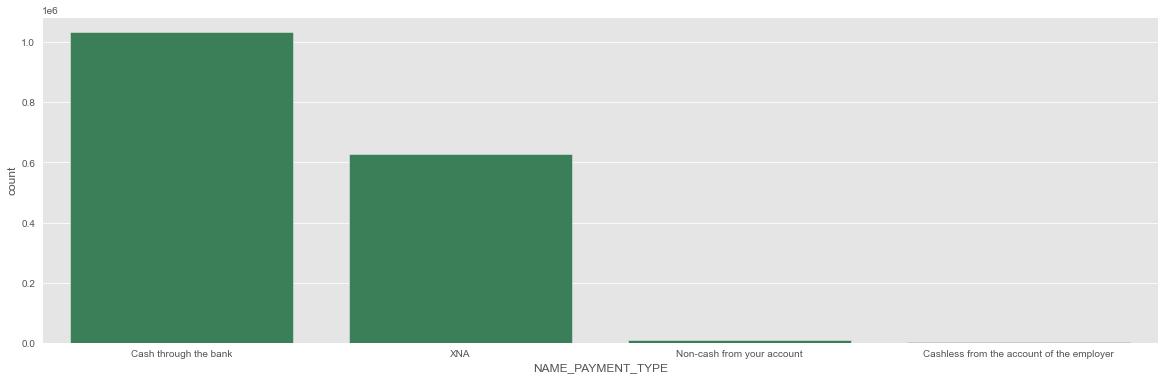

In [153]:
# Use a countplot to see the distribution of the column
plt.figure(figsize=(20,6))
a = sns.countplot(data=prev_df, x='NAME_PAYMENT_TYPE', color='seagreen')
a.set_xticklabels(a.get_xticklabels(),rotation = 0)
plt.show()
# Here XNA values are more than 60000 hence we don't replace it by mode in order to avoid bias in our dataset

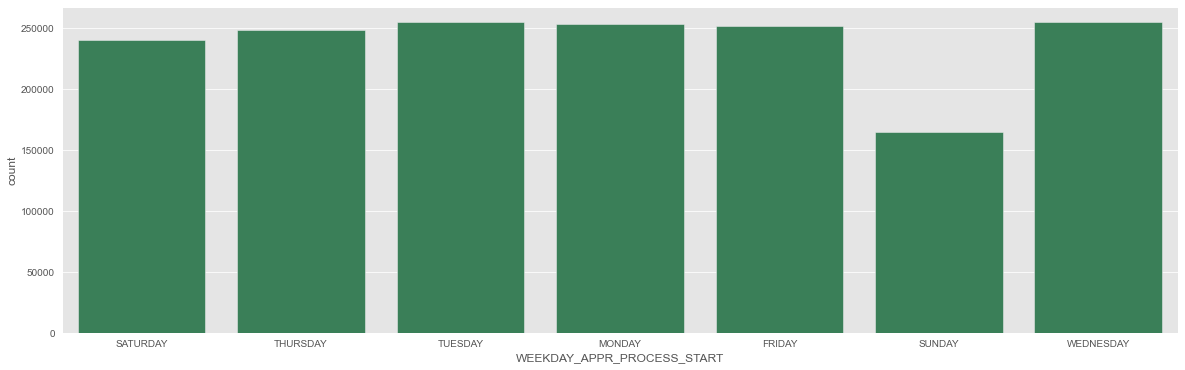

In [154]:
# Use a countplot to see the distribution of the column
plt.figure(figsize=(20,6))
a = sns.countplot(data=prev_df, x='WEEKDAY_APPR_PROCESS_START', color='seagreen')
a.set_xticklabels(a.get_xticklabels(),rotation = 0)
plt.show()
# From the plot we know it has no unknown values

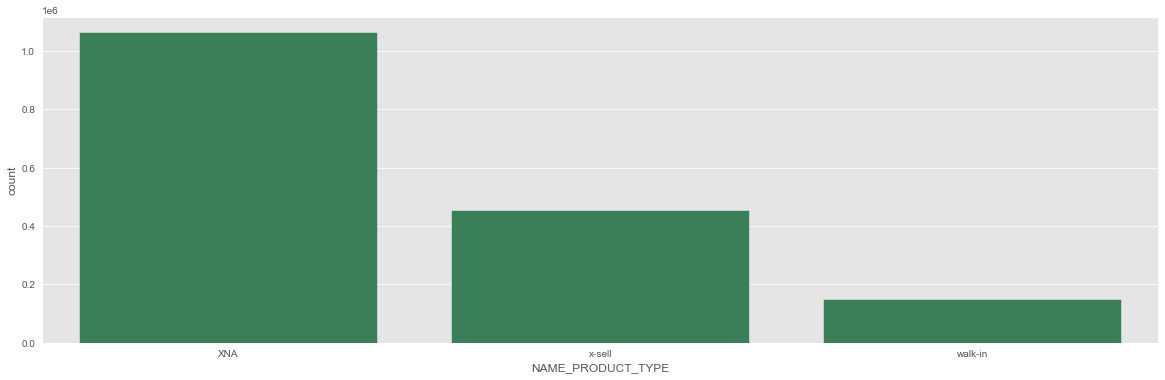

In [155]:
# Use a countplot to see the distribution of the column
plt.figure(figsize=(20,6))
a = sns.countplot(data=prev_df, x='NAME_PRODUCT_TYPE', color='seagreen')
a.set_xticklabels(a.get_xticklabels(),rotation = 0)
plt.show()
# From the plot we know it has XNA elements but it's the mode of the dataset, we don't change this as it may add bias to our dataset

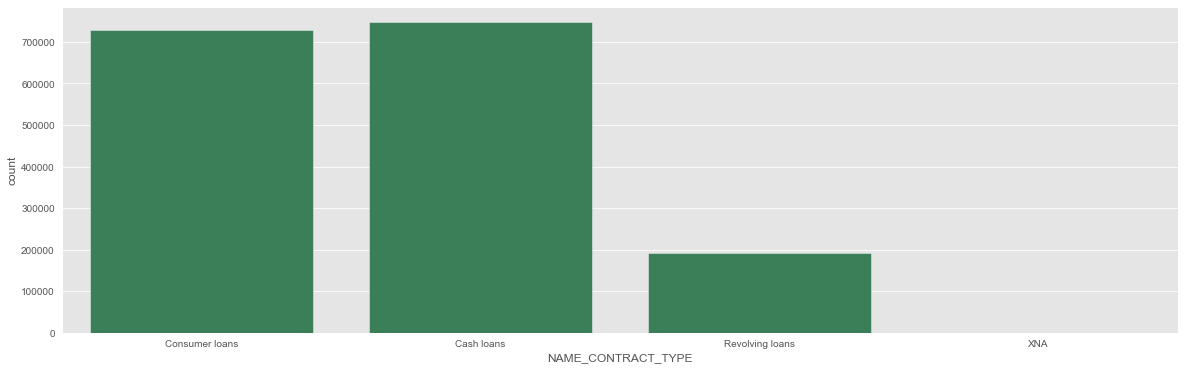

In [156]:
# Use a countplot to see the distribution of the column
plt.figure(figsize=(20,6))
a = sns.countplot(data=prev_df, x='NAME_CONTRACT_TYPE', color='seagreen')
a.set_xticklabels(a.get_xticklabels(),rotation = 0)
plt.show()
# From the plot we know it has XNA elements and replace that with consumer loans the mode of the feature

In [157]:
prev_df['NAME_CONTRACT_TYPE'] = prev_df['NAME_CONTRACT_TYPE'].apply(lambda x: 'Cash loans' if x == 'XNA' else x)

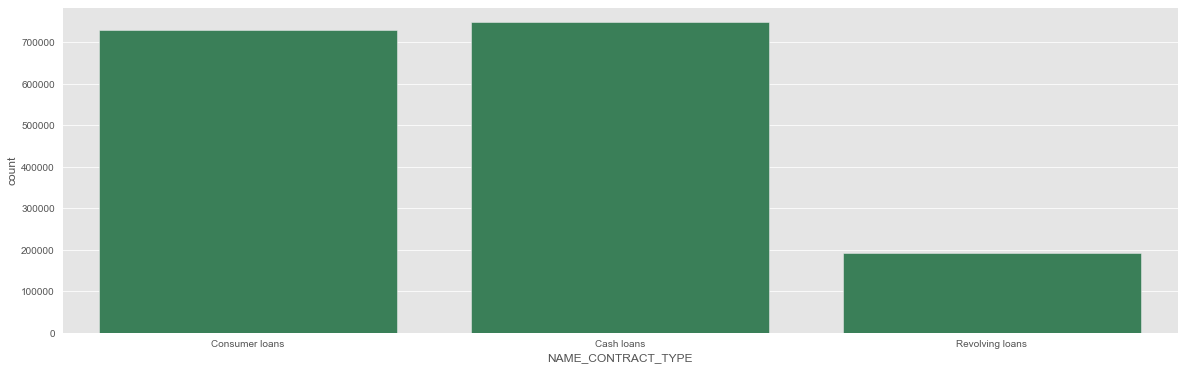

In [158]:
# Use a countplot to see the distribution of the column
plt.figure(figsize=(20,6))
a = sns.countplot(data=prev_df, x='NAME_CONTRACT_TYPE', color='seagreen')
a.set_xticklabels(a.get_xticklabels(),rotation = 0)
plt.show()

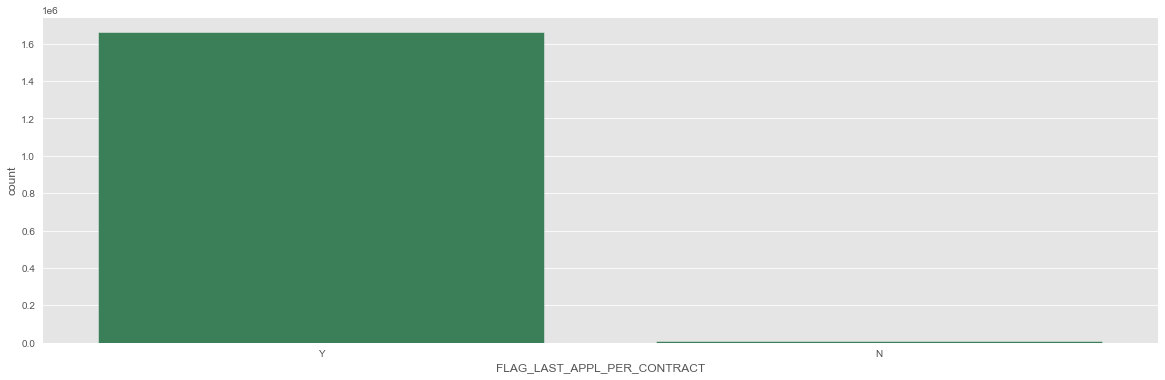

In [159]:
# Use a countplot to see the distribution of the column
plt.figure(figsize=(20,6))
a = sns.countplot(data=prev_df, x='FLAG_LAST_APPL_PER_CONTRACT', color='seagreen')
a.set_xticklabels(a.get_xticklabels(),rotation = 0)
plt.show()
# From the plot we know it has no unknown values

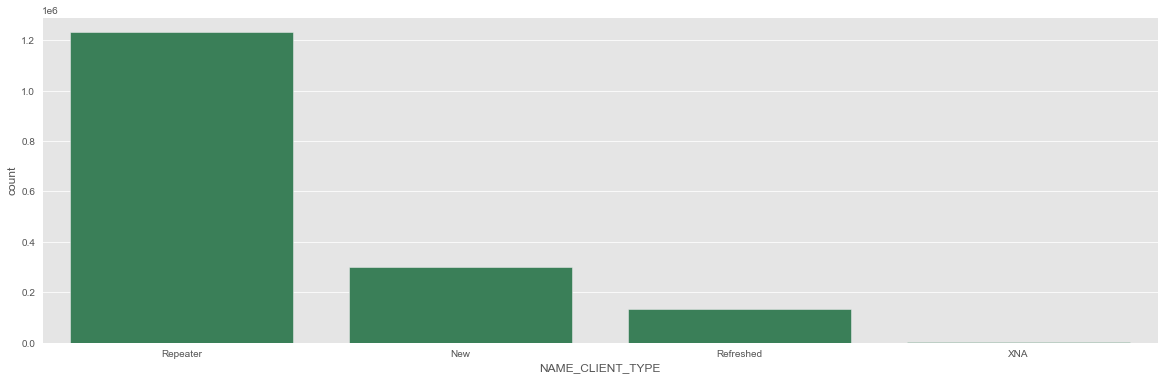

In [160]:
# Use a countplot to see the distribution of the column
plt.figure(figsize=(20,6))
a = sns.countplot(data=prev_df, x='NAME_CLIENT_TYPE', color='seagreen')
a.set_xticklabels(a.get_xticklabels(),rotation = 0)
plt.show()
# From the plot we know it has XNA values and we replace it with Repeater the mode of the feature

In [161]:
prev_df['NAME_CLIENT_TYPE'] = prev_df['NAME_CLIENT_TYPE'].apply(lambda x: 'Repeater' if x == 'XNA' else x)

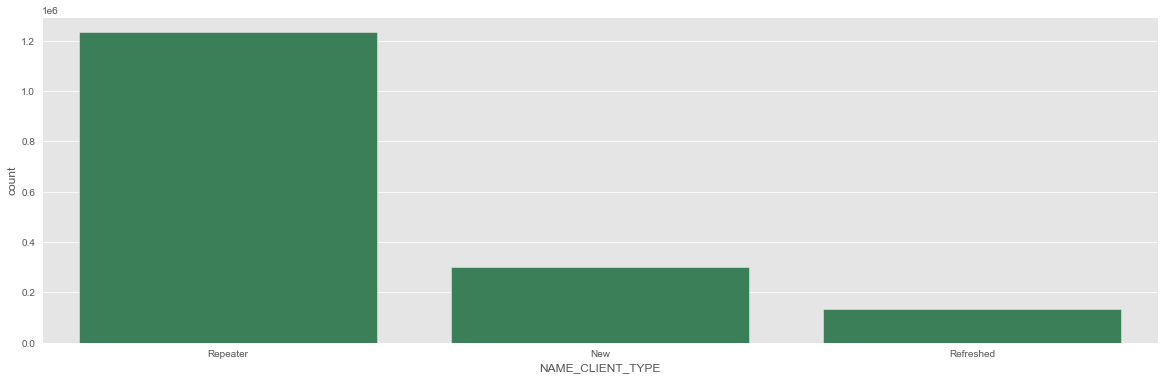

In [162]:
# Use a countplot to see the distribution of the column
plt.figure(figsize=(20,6))
a = sns.countplot(data=prev_df, x='NAME_CLIENT_TYPE', color='seagreen')
a.set_xticklabels(a.get_xticklabels(),rotation = 0)
plt.show()

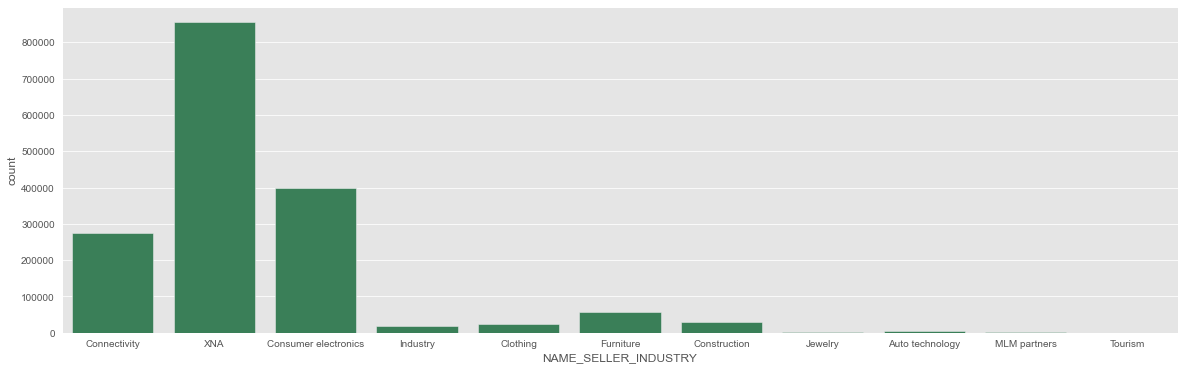

In [163]:
# Use a countplot to see the distribution of the column
plt.figure(figsize=(20,6))
a = sns.countplot(data=prev_df, x='NAME_SELLER_INDUSTRY', color='seagreen')
a.set_xticklabels(a.get_xticklabels(),rotation = 0)
plt.show()
# From the plot we know it has unknown values and it is the mode of the feature, so we don't change it as it may add bias into dataset

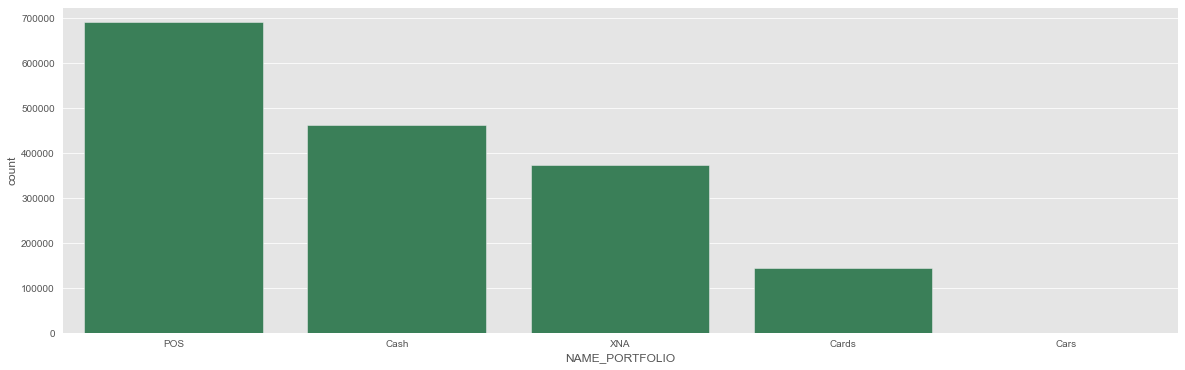

In [164]:
# Use a countplot to see the distribution of the column
plt.figure(figsize=(20,6))
a = sns.countplot(data=prev_df, x='NAME_PORTFOLIO', color='seagreen')
a.set_xticklabels(a.get_xticklabels(),rotation = 0)
plt.show()
# From the plot we know it has unknown values but it is greater than 370000 so we don't replace it as we don't want to add bias in the dataset

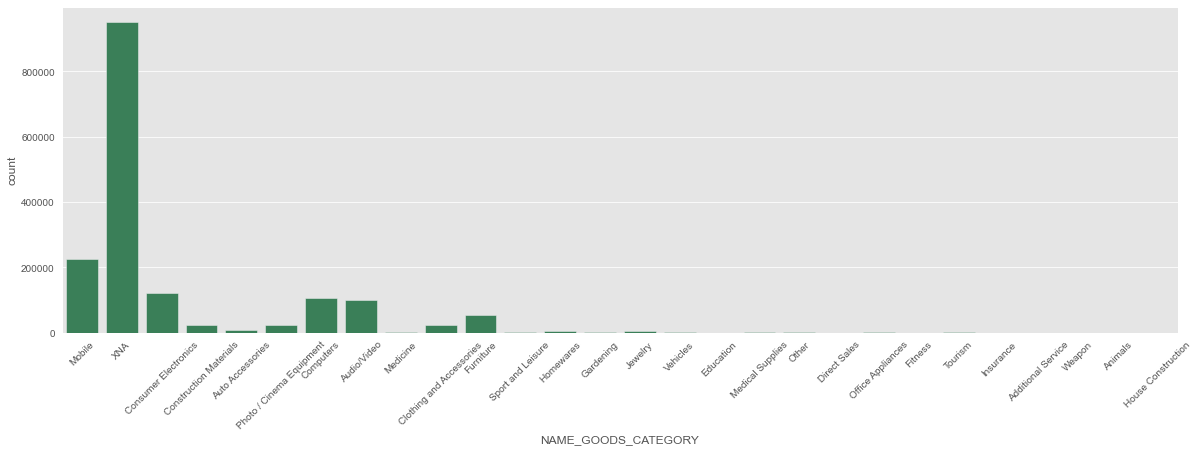

In [165]:
# Use a countplot to see the distribution of the column
plt.figure(figsize=(20,6))
ax = sns.countplot(data=prev_df, x='NAME_GOODS_CATEGORY', color='seagreen')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
plt.show()
# From the plot we know it has unknown values and it's the mode of the feature, so we don't change it in order to not add bias in the dataset

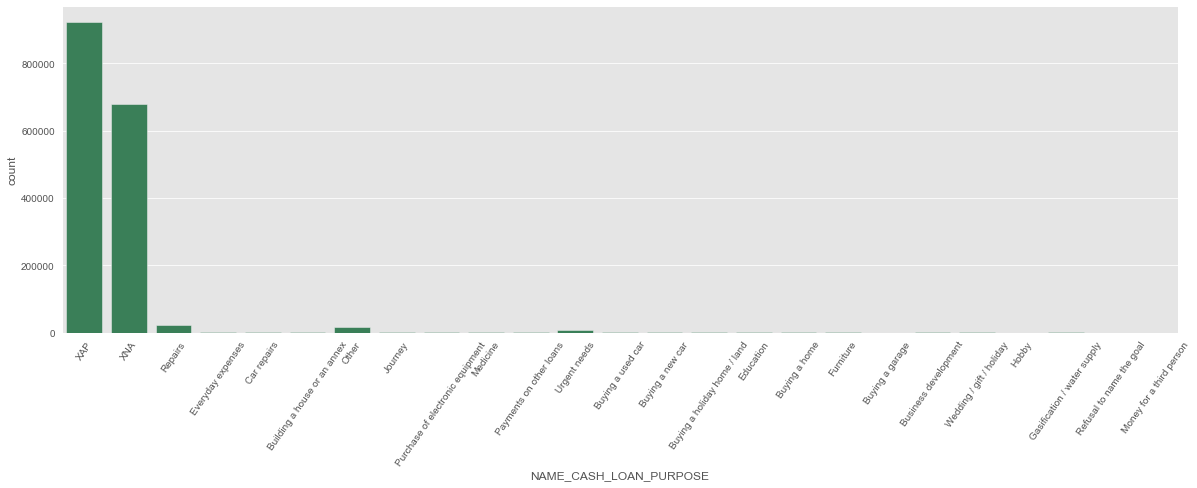

In [166]:
# Use a countplot to see the distribution of the column
plt.figure(figsize=(20,6))
ax = sns.countplot(data=prev_df, x='NAME_CASH_LOAN_PURPOSE', color='seagreen')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 55)
plt.show()
# From the plot we know it has unknown values but it is the second highest value and hence we will not change it

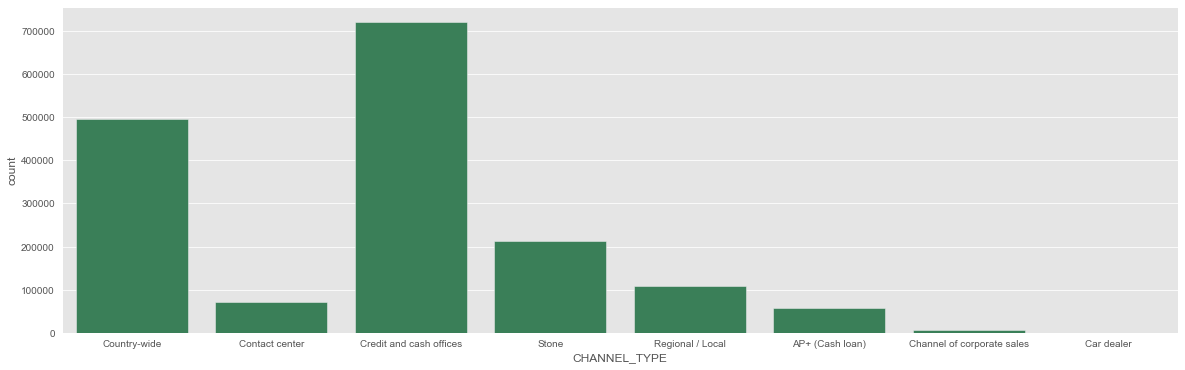

In [167]:
# Use a countplot to see the distribution of the column
plt.figure(figsize=(20,6))
ax = sns.countplot(data=prev_df, x='CHANNEL_TYPE', color='seagreen')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 0)
plt.show()
# From plot we know that we don't have any unknown values

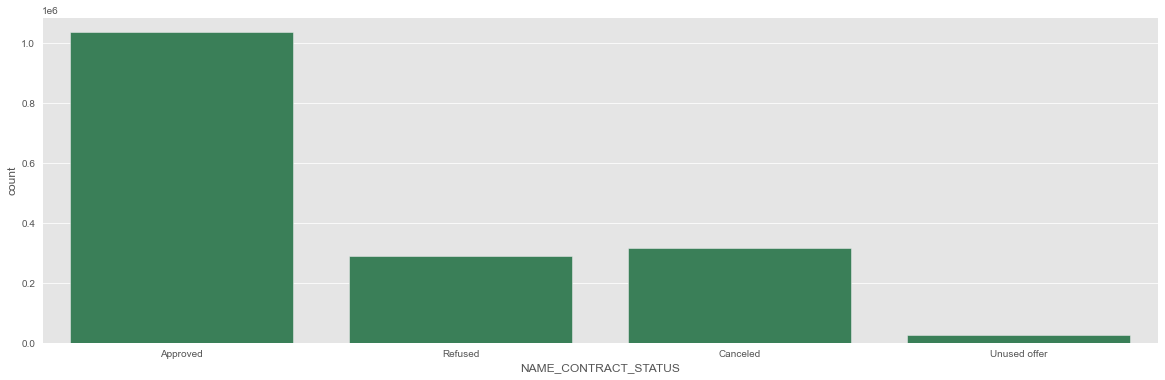

In [168]:
# Use a countplot to see the distribution of the column
plt.figure(figsize=(20,6))
ax = sns.countplot(data=prev_df, x='NAME_CONTRACT_STATUS', color='seagreen')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 0)
plt.show()
# From the plot we know it has no unknown values

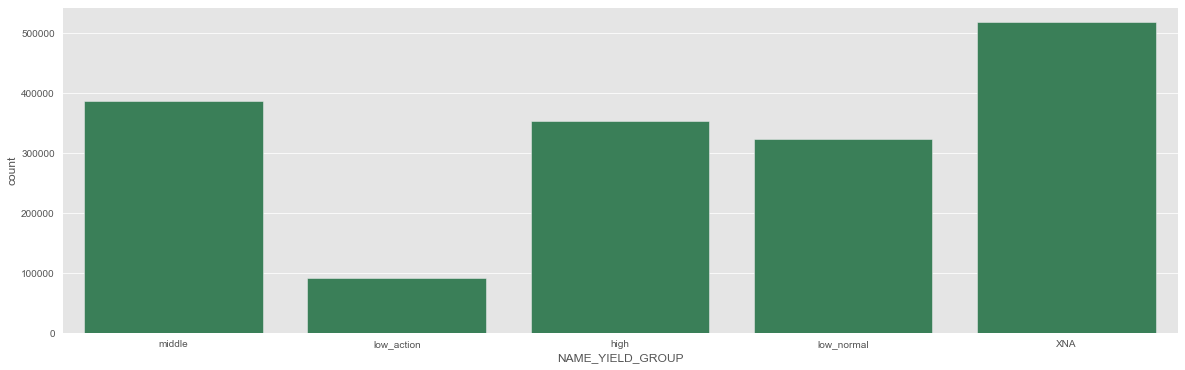

In [169]:
# Use a countplot to see the distribution of the column
plt.figure(figsize=(20,6))
ax = sns.countplot(data=prev_df, x='NAME_YIELD_GROUP', color='seagreen')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 0)
plt.show()
# From the plot we know it has unknown values and it is the mode of the feature so we don't change it 

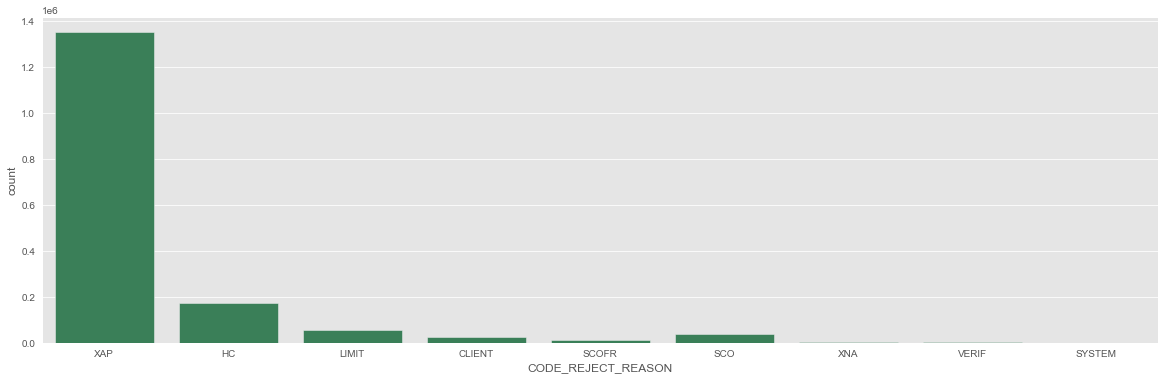

In [170]:
# Use a countplot to see the distribution of the column
plt.figure(figsize=(20,6))
ax = sns.countplot(data=prev_df, x='CODE_REJECT_REASON', color='seagreen')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 0)
plt.show()
# From the plot we know it has unknown values, but it's not the lowest so we don't change it

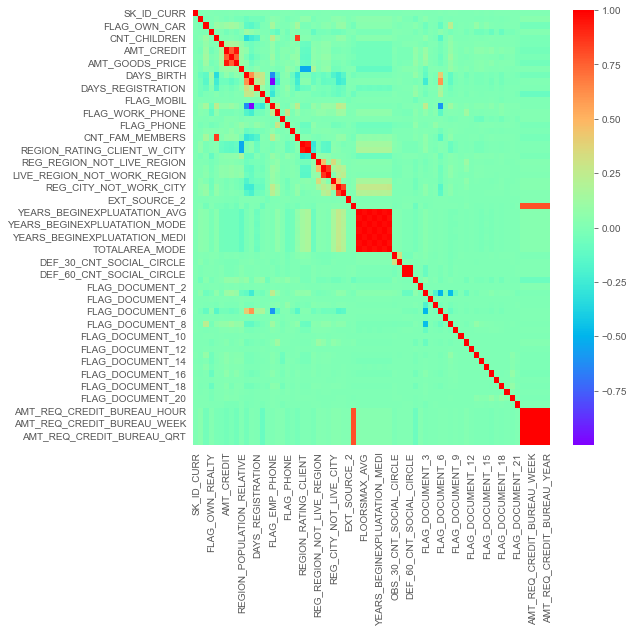

In [171]:
#From here
#Correlation
correlation_application = application_df.corr() 
  
f, ax = plt.subplots(figsize =(8, 8)) 
sns.heatmap(correlation_application, ax = ax, cmap ="rainbow") 
plt.show()

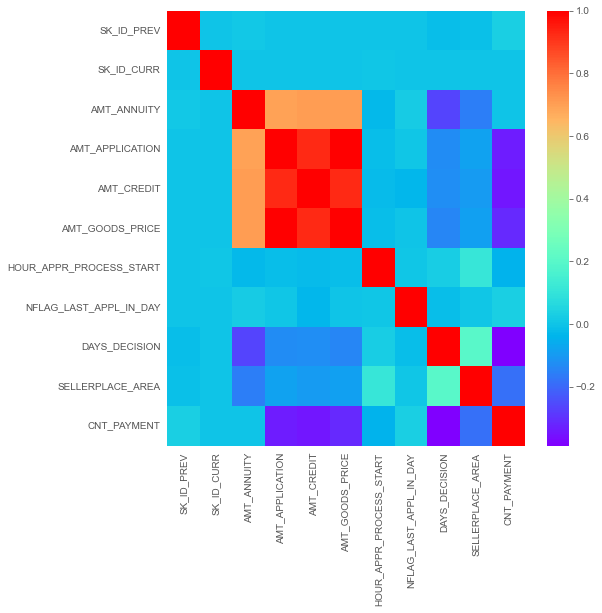

In [172]:
correlation_prev = prev_df.corr() 
  
f, ax = plt.subplots(figsize =(8, 8)) 
sns.heatmap(correlation_prev, ax = ax, cmap ="rainbow") 
plt.show()

In [173]:
merge_df =  pd.merge(application_df,prev_df,on='SK_ID_CURR')

In [174]:
y = merge_df.groupby('SK_ID_CURR').size()
dfA = merge_df.groupby('SK_ID_CURR').agg({'TARGET': np.sum})
dfA['count'] = y

In [175]:
repayer_df = dfA[dfA['TARGET'] == 0]
defaulter_df = dfA[dfA['TARGET'] == 1]

In [176]:
merge_df.isnull().sum()

SK_ID_CURR              0
TARGET                  0
NAME_CONTRACT_TYPE_x    0
CODE_GENDER             0
FLAG_OWN_CAR            0
                       ..
SELLERPLACE_AREA        0
NAME_SELLER_INDUSTRY    0
CNT_PAYMENT             0
NAME_YIELD_GROUP        0
PRODUCT_COMBINATION     0
Length: 106, dtype: int64

In [177]:
merge_df.drop(['SK_ID_CURR'], 1, inplace = True)

In [178]:
merge_df.drop(['SK_ID_PREV'], 1, inplace = True)

In [179]:
merge_df[['FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_MOBIL',
 'FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE',
 'FLAG_PHONE','FLAG_EMAIL','REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','FLAG_DOCUMENT_2','NAME_TYPE_SUITE','OCCUPATION_TYPE',
 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','EMERGENCYSTATE_MODE',
 'FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']]= merge_df[['FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_MOBIL',
                                        'FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE',
                                        'FLAG_PHONE','FLAG_EMAIL','REGION_RATING_CLIENT',
                                        'REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION',
                                        'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',
                                        'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','FLAG_DOCUMENT_2','NAME_TYPE_SUITE','OCCUPATION_TYPE',
                                        'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','EMERGENCYSTATE_MODE',
                                        'FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9',
                                        'FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
                                        'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17',
                                        'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']].astype('category')

In [180]:
# Using get_dummies to change the categorical data, removing old features and replacing it with dummy values
dummy = pd.get_dummies(merge_df[['FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_MOBIL',
                                  'FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE',
                                  'FLAG_PHONE','FLAG_EMAIL','REGION_RATING_CLIENT',
                                  'REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION',
                                  'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',
                                  'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','FLAG_DOCUMENT_2',
                                  'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','EMERGENCYSTATE_MODE',
                                  'FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9',
                                  'FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
                                  'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17',
                                  'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21',
                                  'NAME_CONTRACT_TYPE_x','CODE_GENDER',
                                  'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_TYPE_SUITE','OCCUPATION_TYPE',
                                  'NAME_HOUSING_TYPE','WEEKDAY_APPR_PROCESS_START_x','ORGANIZATION_TYPE','NAME_CONTRACT_TYPE_y',
                                  'WEEKDAY_APPR_PROCESS_START_y','NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE',
                                  'CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY',
                                  'NAME_PORTFOLIO','NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','FLAG_LAST_APPL_PER_CONTRACT',
                                  'NAME_YIELD_GROUP','PRODUCT_COMBINATION',]], drop_first=True)


In [181]:
# Now adding dummy variable to exisiting data frame
merge_df = pd.concat([merge_df, dummy], axis=1)

In [182]:
merge_df = merge_df.drop(['FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_MOBIL',
                          'FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE',
                          'FLAG_PHONE','FLAG_EMAIL','REGION_RATING_CLIENT',
                          'REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION',
                          'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',
                          'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','FLAG_DOCUMENT_2',
                          'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','EMERGENCYSTATE_MODE',
                          'FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9',
                          'FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
                          'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17',
                          'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21',
                          'NAME_CONTRACT_TYPE_x','CODE_GENDER',
                          'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_TYPE_SUITE','OCCUPATION_TYPE',
                          'NAME_HOUSING_TYPE','WEEKDAY_APPR_PROCESS_START_x','ORGANIZATION_TYPE','NAME_CONTRACT_TYPE_y',
                          'WEEKDAY_APPR_PROCESS_START_y','NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE',
                          'CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY',
                          'NAME_PORTFOLIO','NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','FLAG_LAST_APPL_PER_CONTRACT',
                          'NAME_YIELD_GROUP','PRODUCT_COMBINATION'], axis = 1)

In [183]:
merge_df.shape

(1413701, 309)

In [184]:
merge_dfs=merge_df.sample(n = 8000,random_state=12)

In [185]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = merge_dfs.drop(['TARGET'], axis=1)

In [186]:
X.shape

(8000, 308)

In [187]:
# Putting response variable to y
y = merge_dfs['TARGET']

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=70)

In [189]:
X_train.shape

(5600, 308)

In [190]:
X_test.shape

(2400, 308)

In [191]:
y_train.shape

(5600,)

In [192]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT_x','AMT_ANNUITY_x',
         'AMT_GOODS_PRICE_x','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
         'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','CNT_FAM_MEMBERS',
         'HOUR_APPR_PROCESS_START_x','LIVE_CITY_NOT_WORK_CITY','OBS_30_CNT_SOCIAL_CIRCLE',
         'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
         'DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
         'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT',
         'AMT_REQ_CREDIT_BUREAU_YEAR','AMT_ANNUITY_y','AMT_APPLICATION','AMT_CREDIT_y',
         'AMT_GOODS_PRICE_y','HOUR_APPR_PROCESS_START_y',
         'NFLAG_LAST_APPL_IN_DAY','DAYS_DECISION','SELLERPLACE_AREA','CNT_PAYMENT']] = scaler.fit_transform(X_train[['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT_x',
                                                               'AMT_ANNUITY_x','AMT_GOODS_PRICE_x','REGION_POPULATION_RELATIVE',
                                                               'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH',
                                                               'CNT_FAM_MEMBERS','HOUR_APPR_PROCESS_START_x','LIVE_CITY_NOT_WORK_CITY',
                                                               'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE',
                                                               'DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_HOUR',
                                                               'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
                                                               'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','AMT_ANNUITY_y','AMT_APPLICATION',
                                                               'AMT_CREDIT_y','AMT_GOODS_PRICE_y','HOUR_APPR_PROCESS_START_y',
                                                               'NFLAG_LAST_APPL_IN_DAY','DAYS_DECISION','SELLERPLACE_AREA','CNT_PAYMENT']])



In [193]:
X_test[['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT_x','AMT_ANNUITY_x',
         'AMT_GOODS_PRICE_x','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
         'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','CNT_FAM_MEMBERS',
         'HOUR_APPR_PROCESS_START_x','LIVE_CITY_NOT_WORK_CITY','OBS_30_CNT_SOCIAL_CIRCLE',
         'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
         'DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
         'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT',
         'AMT_REQ_CREDIT_BUREAU_YEAR','AMT_ANNUITY_y','AMT_APPLICATION','AMT_CREDIT_y',
         'AMT_GOODS_PRICE_y','HOUR_APPR_PROCESS_START_y',
         'NFLAG_LAST_APPL_IN_DAY','DAYS_DECISION','SELLERPLACE_AREA','CNT_PAYMENT']] = scaler.transform(X_test[['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT_x',
                                                               'AMT_ANNUITY_x','AMT_GOODS_PRICE_x','REGION_POPULATION_RELATIVE',
                                                               'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH',
                                                               'CNT_FAM_MEMBERS','HOUR_APPR_PROCESS_START_x','LIVE_CITY_NOT_WORK_CITY',
                                                               'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE',
                                                               'DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_HOUR',
                                                               'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
                                                               'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','AMT_ANNUITY_y','AMT_APPLICATION',
                                                               'AMT_CREDIT_y','AMT_GOODS_PRICE_y','HOUR_APPR_PROCESS_START_y',
                                                               'NFLAG_LAST_APPL_IN_DAY','DAYS_DECISION','SELLERPLACE_AREA','CNT_PAYMENT']])



In [194]:
# Checking the Converted Rate
Target = round((sum(merge_df['TARGET'])/len(merge_df['TARGET'].index))*100,2)
print("We have manipulated {} % data successfully".format(Target))

We have manipulated 8.66 % data successfully


In [195]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
model_nb = GaussianNB()

In [196]:
#fit the model with the training data
model_nb.fit(X_train,y_train)

GaussianNB()

In [197]:
predict_train_NB = model_nb.predict(X_train)
predict_train_NB

array([0, 0, 0, ..., 1, 1, 0])

In [198]:
trainaccuracy_NB = accuracy_score(y_train,predict_train_NB)
print('accuracy score on train dataset using gaussian naive bayes : ', trainaccuracy_NB)

accuracy score on train dataset using gaussian naive bayes :  0.7033928571428572


In [199]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train, predict_train_NB)
print(confusion)

[[3712 1392]
 [ 269  227]]


In [200]:
TP_NB_Model = confusion[0,0]  
TN_NB_Model = confusion[1,1] 
FP_NB_Model = confusion[0,1] 
FN_NB_Model = confusion[1,0] 

In [201]:
precision_nb_Model = TP_NB_Model/(TP_NB_Model+FP_NB_Model)
recall_nb_Model = TP_NB_Model/(TP_NB_Model+FN_NB_Model)
print("Gaussian_Naive_Bayes Precision_train : ",precision_nb_Model)
print("Gaussian_Naive_Bayes Recall_train : ",recall_nb_Model)

Gaussian_Naive_Bayes Precision_train :  0.7272727272727273
Gaussian_Naive_Bayes Recall_train :  0.9324290379301683


In [202]:
def draw_roc_curve( actual, probability ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probability,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probability )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

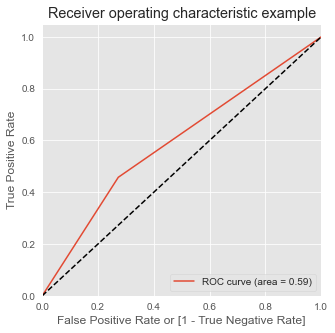

In [203]:
draw_roc_curve(y_train,predict_train_NB)

In [204]:
# now using predict method to test the test data set
predict_test_NB = model_nb.predict(X_test)

In [205]:
confusion2_nb_Model = metrics.confusion_matrix(y_test, predict_test_NB)
print(confusion2_nb_Model)

[[1560  651]
 [  96   93]]


In [206]:
TP_NB_Model_TEST = confusion2_nb_Model[0,0] 
TN_NB_Model_TEST = confusion2_nb_Model[1,1] 
FP_NB_Model_TEST = confusion2_nb_Model[0,1] 
FN_NB_Model_TEST = confusion2_nb_Model[1,0] 

In [207]:
precision_nb_Model_test = TP_NB_Model_TEST/(TP_NB_Model_TEST+FP_NB_Model_TEST)
recall_nb_Model_test = TP_NB_Model_TEST/(TP_NB_Model_TEST+FN_NB_Model_TEST)
print("Gaussian_Naive_Bayes Precision_test : ",precision_nb_Model_test)
print("Gaussian_Naive_Bayes Recall_test : ",recall_nb_Model_test)

Gaussian_Naive_Bayes Precision_test :  0.7055630936227951
Gaussian_Naive_Bayes Recall_test :  0.9420289855072463


In [208]:
#Let's check the overall accuracy.
testaccuracy_NB= accuracy_score(y_test,predict_test_NB)
testaccuracy_NB

0.68875

In [209]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#calculate 
rmse_nb = sqrt(mean_squared_error(y_test, predict_test_NB))
print("RMSE for Naive Bayes is : ",rmse_nb)

RMSE for Naive Bayes is :  0.557897840110535


In [210]:
print("Train Data Accuracy using naive bayes   : {} %".format(round((trainaccuracy_NB*100),2)))
print("Test Data Accuracy using naive bayes    : {} %".format(round((testaccuracy_NB*100),2)))

Train Data Accuracy using naive bayes   : 70.34 %
Test Data Accuracy using naive bayes    : 68.88 %


In [211]:
#SVM model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
model_SVM = SVC()

In [212]:
#fit the model with the training data
model_SVM.fit(X_train,y_train)

SVC()

In [213]:
#predict the target on the train dataset
predict_train_SVM = model_SVM.predict(X_train)
predict_train_SVM

array([0, 0, 0, ..., 0, 0, 0])

In [214]:
trainaccuracy_SVM = accuracy_score(y_train,predict_train_SVM)
print('accuracy score on train dataset using SVM : ', trainaccuracy_SVM)

accuracy score on train dataset using SVM :  0.9114285714285715


In [215]:
from sklearn import metrics
# Confusion matrix 
confusion_SVM = metrics.confusion_matrix(y_train, predict_train_SVM)
print(confusion_SVM)

[[5104    0]
 [ 496    0]]


In [216]:
TP_SVM_Model = confusion_SVM[0,0] # true positive 
TN_SVM_Model = confusion_SVM[1,1] # true negatives
FP_SVM_Model = confusion_SVM[0,1] # false positives
FN_SVM_Model = confusion_SVM[1,0] # false negatives

In [217]:
precision_svm_Model = TP_SVM_Model/(TP_SVM_Model+FP_SVM_Model)
recall_svm_Model = TP_SVM_Model/(TP_SVM_Model+FP_SVM_Model)
print("Support_Vector_Machine Precision_train : ",precision_svm_Model)
print("Support_Vector_Machine Recall_train : ",recall_svm_Model)

Support_Vector_Machine Precision_train :  1.0
Support_Vector_Machine Recall_train :  1.0


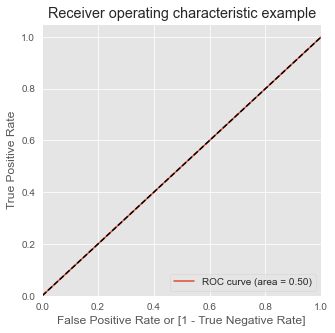

In [218]:
draw_roc_curve(y_train,predict_train_SVM)

In [219]:
# now using predict method to test the test data set
predict_test_SVM = model_SVM.predict(X_test)

In [220]:
confusion2_SVM = metrics.confusion_matrix(y_test, predict_test_SVM)
print(confusion2_SVM)

[[2211    0]
 [ 189    0]]


In [221]:
TP_SVM_Model_TEST = confusion_SVM[0,0] 
TN_SVM_Model_TEST = confusion_SVM[1,1] 
FP_SVM_Model_TEST = confusion_SVM[0,1] 
FN_SVM_Model_TEST = confusion_SVM[1,0]

In [222]:
precision_svm_Model_test = TP_SVM_Model_TEST/(TP_SVM_Model_TEST+FP_SVM_Model_TEST)
recall_svm_Model_test = TP_SVM_Model_TEST/(TP_SVM_Model_TEST+FN_SVM_Model_TEST)
print("Support_Vector_Machine Precision_test : ",precision_svm_Model_test)
print("Support_Vector_Machine Recall_test : ",recall_svm_Model_test)

Support_Vector_Machine Precision_test :  1.0
Support_Vector_Machine Recall_test :  0.9114285714285715


In [223]:
#Let's check the overall accuracy.
testaccuracy_SVM= accuracy_score(y_test,predict_test_SVM)
testaccuracy_SVM

0.92125

In [224]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#calculate 
rmse_SVM_Model = sqrt(mean_squared_error(y_test, predict_test_SVM))
print("RMSE for SVM is : ",rmse_SVM_Model)

RMSE for SVM is :  0.2806243040080456


In [225]:
print("Train Data Accuracy using SVM   :{} %".format(round((trainaccuracy_SVM*100),2)))
print("Test Data Accuracy using SVM    :{} %".format(round((testaccuracy_SVM*100),2)))

Train Data Accuracy using SVM   :91.14 %
Test Data Accuracy using SVM    :92.12 %


In [226]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
model_KNN = KNeighborsClassifier()

In [227]:
# fit the model with the training data
model_KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [228]:
# predict the target on the train dataset
predict_train_KNN = model_KNN.predict(X_train)
predict_train_KNN

array([0, 0, 0, ..., 0, 0, 0])

In [229]:
trainaccuracy_KNN = accuracy_score(y_train,predict_train_KNN)
print('accuracy score on train dataset using KNN : ', trainaccuracy_KNN)

accuracy score on train dataset using KNN :  0.9155357142857142


In [230]:
from sklearn import metrics
# Confusion matrix 
confusion_KNN = metrics.confusion_matrix(y_train, predict_train_KNN)
print(confusion_KNN)

[[5087   17]
 [ 456   40]]


In [231]:
TP_KNN_Model = confusion_KNN[0,0] 
TN_KNN_Model = confusion_KNN[1,1] 
FP_KNN_Model = confusion_KNN[0,1]
FN_KNN_Model = confusion_KNN[1,0] 

In [232]:
precision_knn_Model = TP_KNN_Model/(TP_KNN_Model+FP_KNN_Model)
recall_knn_Model = TP_KNN_Model/(TP_KNN_Model+FP_KNN_Model)
print("K_Nearest_Neighbour Precision_train : ",precision_knn_Model)
print("K_Nearest_Neighbour Recall_train : ",precision_knn_Model)

K_Nearest_Neighbour Precision_train :  0.9966692789968652
K_Nearest_Neighbour Recall_train :  0.9966692789968652


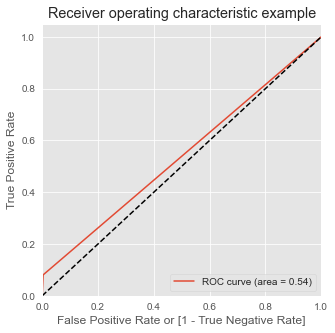

In [233]:
draw_roc_curve(y_train,predict_train_KNN)

In [234]:
# now using predict method to test the test data set
predict_test_KNN = model_KNN.predict(X_test)

In [235]:
confusion2_KNN = metrics.confusion_matrix(y_test, predict_test_KNN)
print(confusion2_KNN)

[[2197   14]
 [ 189    0]]


In [236]:
TP_KNN_Model_TEST = confusion2_KNN[0,0]  
TN_KNN_Model_TEST = confusion2_KNN[1,1] 
FP_KNN_Model_TEST = confusion2_KNN[0,1] 
FN_KNN_Model_TEST = confusion2_KNN[1,0]

In [237]:
precision_knn_Model_test = TP_KNN_Model_TEST/(TP_KNN_Model_TEST+FP_KNN_Model_TEST)
recall_knn_Model_test = TP_KNN_Model_TEST/(TP_KNN_Model_TEST+FP_KNN_Model_TEST)
print("K_Nearest_Neighbour Precision_test : ",precision_knn_Model_test)
print("K_Nearest_Neighbour Recall_test: ",precision_knn_Model_test)

K_Nearest_Neighbour Precision_test :  0.9936680235187698
K_Nearest_Neighbour Recall_test:  0.9936680235187698


In [238]:
# Let's check the overall accuracy.
testaccuracy_KNN = accuracy_score(y_test,predict_test_KNN)
testaccuracy_KNN

0.9154166666666667

In [239]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#calculate 
rmse_knn = sqrt(mean_squared_error(y_test, predict_test_KNN))
print("RMSE for KNN is : ",rmse_knn)

RMSE for KNN is :  0.29083213944358577


In [240]:
print("Train Data Accuracy using KNN    :{} %".format(round((trainaccuracy_KNN*100),2)))
print("Test Data Accuracy using KNN     :{} %".format(round((testaccuracy_KNN*100),2)))

Train Data Accuracy using KNN    :91.55 %
Test Data Accuracy using KNN     :91.54 %
